# Projet 7-1: Exploratory Data Analysis

First approach of data provided for the seventh project.    

The main goal of this project is to build a predictive model capable of providing the probability of failure to repay a loan provided by the 'Prêts à dépenser' company. For this, we have eight databases of various information concerning the company's customers (anonymized personal data, history of previously obtained loans, type of loan, etc.).  

In this notebook we will mainly focus on the main bases of application_train and application_test. First of all to visualize some features and corresponding descriptive statistics and also to see if there are already outliers or anomalous data to correct.

In [1]:
# File system management
import os

In [2]:
# memory management
import sys
import gc

In [3]:
# Main libraries
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Secondary libraries
import timeit

In [4]:
# Mode 'dark' for plottings
plt.style.use('dark_background')

In [5]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

### Data loading

In [6]:
# Move to the appropriate folder
os.chdir('data_1-2')
print(os.getcwd())

C:\Users\rapha\Google Drive\formation_DataSc\projet7\livrables\OC_projet7\data_1-2


In [7]:
# List files available
print(os.listdir(os.getcwd()))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'test_LargeGlobalBase.csv', 'train_LargeGlobalBase.csv']


List of available databases:  
- application_test  
- application_train  
- bureau  
- bureau_balance  
- credit_card_balance  
- HomeCredit_columns_description  
- installments_payments  
- POS_CASH_balance  
- previous_application  

<ins>rem:</ins> test_LargeGlobalBase.csv and train_LargeGlobalBase.csv are two large databases produced in the second notebook. They are just here for safety but are not processed in this notebook.

HomeCredit_columns_description give some details about the features of each dataset. A quick glance in a spreadsheet like Excel reveals a total of 221 features. It does not contain any numerical or categorical data directly useful for modeling.

#### Application_train dataset

In [27]:
# Training data
app_train = pd.read_csv(os.path.abspath('application_train.csv'))
print('Train data shape  : ', app_train.shape)

Train data shape  :  (307511, 122)


In [175]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [176]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Application_test dataset

In [177]:
# Testing data
app_test = pd.read_csv(os.path.abspath('application_test.csv'))
print('Test data shape  : ', app_test.shape)

Test data shape  :  (48744, 121)


In [178]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [179]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The app_train dataframe contains one more column than the app_test dataframe. At first glance it seems to be the TARGET column which indicates whether the customer has had payment difficulties. We will check the columns present for each of the two dataframes to ensure that the other columns are indeed identical.

In [180]:
[col for col in app_train.columns if col not in(app_test.columns)]

['TARGET']

Except for the TARGET column, the two dataframes have indeed the same columns.

### 'TARGET' column

In [181]:
print('total nb of missing values:', app_train['TARGET'].isna().sum())
print('list of unique values:', app_train['TARGET'].drop_duplicates().sort_values(ascending=True).to_numpy())

total nb of missing values: 0
list of unique values: [0 1]


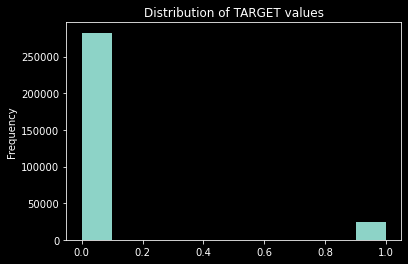

In [182]:
# Plot of TARGET distribution
app_train['TARGET'].plot.hist()
plt.title('Distribution of TARGET values')
plt.show()

In [183]:
print('Ratio of 0 in TARGET: {} %'.format(round(len(app_train[app_train['TARGET']==0])/len(app_train)*100,2)))
print('Ratio of 1 in TARGET: {} %'.format(round(len(app_train[app_train['TARGET']==1])/len(app_train)*100,2)))

Ratio of 0 in TARGET: 91.93 %
Ratio of 1 in TARGET: 8.07 %


TARGET is a feature of *int* type, entirely filled and with only 2 possible values : 0 and 1 (corresponding respectively to 'no-default-of-payment' and 'default-of-payment'). The values distribution is very inhomogenous with a much bigger part of 0 regarding to 1 (about 90/10).

### filling rate of the features

In [184]:
# filling rate of each column (in percent)
def notNA_prct(df):
    
    NA_qty=df.isna().sum() # sum on NAN in df
    NA_prct= (NA_qty/len(df))*100 # percentage of NAN in df
    notNA_prct=(100-NA_prct).round(2) # percentage of data actually filled in
    notNA_prct.sort_values(ascending=False, inplace=True) # sorting values decreasingly
    
    return(notNA_prct)

In [185]:
app_train_75=notNA_prct(app_train).index.where((notNA_prct(app_train).values>=75)==True).dropna()
app_test_75=notNA_prct(app_test).index.where((notNA_prct(app_test).values>=75)==True).dropna()

ratio_train = len(app_train_75)/len(app_train.columns)
ratio_test = len(app_test_75)/len(app_test.columns)

print('Total number of features at least 75% filled,')
print('app_tain: %i (ratio of all features: %0.2f)'%(len(app_train_75), ratio_train))
print('app_test: %i (ratio of all features: %0.2f)'%(len(app_test_75), ratio_test))

Total number of features at least 75% filled,
app_tain: 72 (ratio of all features: 0.59)
app_test: 71 (ratio of all features: 0.59)


In [186]:
print('Column specific to app_train_75:',[col for col in app_train_75 if col not in(app_test_75)])

Column specific to app_train_75: ['TARGET']


As already seen before the app_test dataframe does not contain the TARGET column, so this supernumerary feature in this extract of the app_train dataframe is not a surprise.  

The fact that we have comparable results in terms of filling rates tend to make think that the dataframes app_train and app_test probably have the same general behaviors, so for the following we will limit ourselves only to the study of app_train and will consider the obtained results as also applying to app_test.  

In order to reduce the amount of features explored we also limit it to the selection of "at least 75 % filled" features of app_train_75.

### Data types

In [187]:
app_train_75

Index(['SK_ID_CURR', 'FLAG_WORK_PHONE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_OWN_REALTY', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'TARGET', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17',
       'FLAG_D

It's a shame we have lost two interesting features because of this 75% filling rate condition:  
- OCCUPATION_TYPE  
- EXT_SOURCE_1

In [188]:
# Saving of the OCCUPATION_TYPE and EXT_SOURCE_1 feature
OCCUPATION_TYPE=app_train['OCCUPATION_TYPE']
EXT_SOURCE_1=app_train['EXT_SOURCE_1']

In [189]:
notNA_prct(pd.DataFrame(data=EXT_SOURCE_1))

EXT_SOURCE_1    43.62
dtype: float64

In [190]:
notNA_prct(pd.DataFrame(data=OCCUPATION_TYPE))

OCCUPATION_TYPE    68.65
dtype: float64

These two features are indeed well below the desired 75% filling rate.

In [191]:
# Reduction of app_train with features fulfilled at 75%
app_train=app_train[app_train_75]

In [192]:
# Restore EXT_SOURCE_1 and OCCUPATION type (for consistency purpose)
app_train['EXT_SOURCE_1'] = EXT_SOURCE_1
app_train['OCCUPATION_TYPE'] = OCCUPATION_TYPE

In [193]:
app_train.dtypes.value_counts()

int64      41
float64    21
object     12
dtype: int64

In [194]:
app_train.head()

,SK_ID_CURR,FLAG_WORK_PHONE,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,EXT_SOURCE_3,EXT_SOURCE_1,OCCUPATION_TYPE
0,100002,0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,...,Unaccompanied,1.0,0.0,0.0,0.0,0.0,0.0,0.139376,0.083037,Laborers
1,100003,0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,...,Family,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.311267,Core staff
2,100004,1,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,...,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,0.729567,NaN,Laborers
3,100006,0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,...,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers
4,100007,0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,...,Unaccompanied,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Core staff


There are much more numerical data than categorical data. First we explore the categorical data, then explore the float64 data since they are less of this type than int64, and finally explore a selection of int64.

#### Object data

In [195]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
FLAG_OWN_REALTY                2
WEEKDAY_APPR_PROCESS_START     7
NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
ORGANIZATION_TYPE             58
NAME_TYPE_SUITE                7
OCCUPATION_TYPE               18
dtype: int64

There are surprisingly much more unique categories for 'ORGANIZATION_TYPE' than for any other features. We will probably pass this one.  
Two features seem to be binary: 'FLAG_OWN_REALTY' and 'FLAG_OWN_CAR'.

In [34]:
# General function for histogram and scatter plots
def data_plotting(df, column, ratio_pop_max=1.0):
    '''
    df = Dataframe in which the information is extracted
    column = Column of interest
    ratio_pop_max = Maximum cumulative percentage of the populations
                    displayed at the head of the graphs. 
                    By default all populations are displayed (i.e. 100%) 
                    but this can be restricted to 90 or 95% of the total 
                    population (if there are too many unique values). 
    '''
    # reduction to the columns of interest
    df2=df[[column,'TARGET']]
    df2.fillna('NaN', inplace=True)
    
    # list of the unique values of the column
    values=df2.drop_duplicates(subset=column)[column].to_numpy() 
    
    # count of the population for each unique value
    population=list()
    for value in values:
        population.append(len(df2[df2[column]==value])) 
    
    # Make a dataframe with results above
    data_df = pd.DataFrame({'value':values, 'population':population})
    
    # Count of failure / success for each unique value
    value_success=list()    
    value_failure=list()
    for value in values:
        success=df2[df2[column]==value]['TARGET']==0
        failure=df2[df2[column]==value]['TARGET']==1
        value_success.append(sum(success))
        value_failure.append(sum(failure))

    # Add this information to the dataframe
    data_df['success']=value_success
    data_df['failure']=value_failure
    
    # Sorting of the unique value by descrescing populations
    data_df.sort_values(by='population', ascending=False, inplace=True)
    
    # Display the unique values, their populations and ratio (with %age restriction)
    ratio_population_list=list()
    ratio_success_list=list()
    value_list=list()
    ratio_population_cumul=0
    for value in data_df['value']:
        
        population= data_df[data_df['value']==value]['population'].to_numpy()
        ratio_population = population/len(df)
        
        success_population = data_df[data_df['value']==value]['success'].to_numpy()
        failure_population = data_df[data_df['value']==value]['failure'].to_numpy()
    
        ratio_success = np.round(success_population/population, 6)
        ratio_failure = np.round(failure_population/population, 6)
        
        # lists for scatter plot hereafter
        ratio_population_list.append(ratio_population)
        ratio_success_list.append(ratio_success)
        value_list.append(value)
        
        ratio_population_cumul = ratio_population_cumul + ratio_population

        if ratio_population_cumul <= ratio_pop_max:
            print('%s, popul.: %i, pop/total ratio: %0.2f, success: %i, failure: %i, s/f ratio: %0.2f/%0.2f'
                  %(value, population, ratio_population, success_population, failure_population, ratio_success, ratio_failure) 
            )
    
    # plotting
    fig, (hist, scat) = plt.subplots(1, 2, figsize=(12, 5))
    
    # histogram of populations
    rects1 = hist.bar(data_df['value'], data_df['success'], bottom = data_df['failure'], label='success')
    rects2 = hist.bar(data_df['value'], data_df['failure'], label='failure')
    
    if type(values[0])==np.str:
        if len(values) > 3 and np.mean([len(i) for i in values]) > 4 : # rotate x labels if only they are long and numerous
            hist.set_xticklabels(data_df['value'],rotation=45, rotation_mode="anchor", ha="right")
        else :
            pass
    elif type(values[0])==(np.int64 or np.float64):
        hist.set_xlabel('value')
        
    
    hist.set_ylabel('population')
    hist.set_title(column)
    hist.legend()
    
    # scatter plot
    scat.scatter(x=ratio_success_list, y=ratio_population_list, marker='+')
    scat.set_xlabel('%age of success')
    scat.set_ylabel('%age of population')
    scat.set_title(column+' scatter plot')

    i=0 # iterator
    for x,y in zip(ratio_success_list,ratio_population_list):
        label = f'{value_list[i]}'
        scat.annotate(label,
                      (x,y), # coordinates to position the label
                      textcoords="offset points", # how to position the text
                      xytext=(5,5), # distance from text to points (x,y)
                      ha='left')
        i+=1

    plt.show()

For all the following plots and results, the key informations are the ratios given in the headlines:  
- 'pop/total ratio' represents the relative part of the category in the whole population (can be usefull to ponderate a exceptional good success/failure ratio).  
- 's/f ratio' represents the relative parts of success and failure in the paybacks (e.g. a 90/10 ratio indicates that 90% of loans of the given category has been refunded and 10% hasn't.

Working, popul.: 158774, pop/total ratio: 0.52, success: 143550, failure: 15224, s/f ratio: 0.90/0.10
Commercial associate, popul.: 71617, pop/total ratio: 0.23, success: 66257, failure: 5360, s/f ratio: 0.93/0.07
Pensioner, popul.: 55362, pop/total ratio: 0.18, success: 52380, failure: 2982, s/f ratio: 0.95/0.05
State servant, popul.: 21703, pop/total ratio: 0.07, success: 20454, failure: 1249, s/f ratio: 0.94/0.06
Unemployed, popul.: 22, pop/total ratio: 0.00, success: 14, failure: 8, s/f ratio: 0.64/0.36
Student, popul.: 18, pop/total ratio: 0.00, success: 18, failure: 0, s/f ratio: 1.00/0.00
Businessman, popul.: 10, pop/total ratio: 0.00, success: 10, failure: 0, s/f ratio: 1.00/0.00
Maternity leave, popul.: 5, pop/total ratio: 0.00, success: 3, failure: 2, s/f ratio: 0.60/0.40


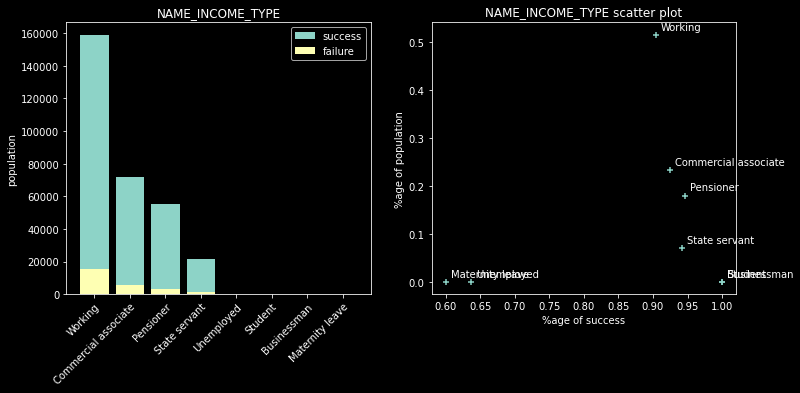

In [197]:
data_plotting(app_train,'NAME_INCOME_TYPE')

<ins>Observations:</ins> This is a good exemples of the pop/total ratio usefullnes: the four last categories count just few individual for each of them. The extremely good success rate of the busynessmen and students are probably not that reliable. On the other hand the high rate of failure of unemployed and maternity leave can be biased by the fact that very few of them are granted of a loan (even though it seems to be conceivable that they are indeed an economicaly fragile population).

Secondary / secondary special, popul.: 218391, pop/total ratio: 0.71, success: 198867, failure: 19524, s/f ratio: 0.91/0.09
Higher education, popul.: 74863, pop/total ratio: 0.24, success: 70854, failure: 4009, s/f ratio: 0.95/0.05
Incomplete higher, popul.: 10277, pop/total ratio: 0.03, success: 9405, failure: 872, s/f ratio: 0.92/0.08
Lower secondary, popul.: 3816, pop/total ratio: 0.01, success: 3399, failure: 417, s/f ratio: 0.89/0.11
Academic degree, popul.: 164, pop/total ratio: 0.00, success: 161, failure: 3, s/f ratio: 0.98/0.02


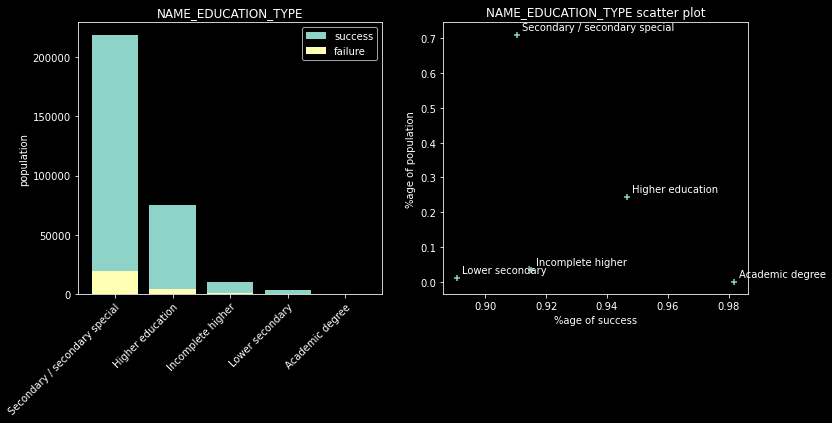

In [198]:
data_plotting(app_train,'NAME_EDUCATION_TYPE')

<ins>Observations:</ins> Academic degrees have excellent success/failure ratio but are much rarer than any other category of education type. On the other hand, secondary eductaion (lower, 'classic' or special) present the higher risk of payback failure whereas 'classic' and special secondary education represent most of the cliensts (about 70% of the total population).

The OCCUPATION_TYPE feature counts much more different categories. To lighten the display above the graphs, we limit the rows to a cumulative population ratio of 99% (in other words the rows displayed cover 99% of the total population).

NaN, popul.: 96391, pop/total ratio: 0.31, success: 90113, failure: 6278, s/f ratio: 0.93/0.07
Laborers, popul.: 55186, pop/total ratio: 0.18, success: 49348, failure: 5838, s/f ratio: 0.89/0.11
Sales staff, popul.: 32102, pop/total ratio: 0.10, success: 29010, failure: 3092, s/f ratio: 0.90/0.10
Core staff, popul.: 27570, pop/total ratio: 0.09, success: 25832, failure: 1738, s/f ratio: 0.94/0.06
Managers, popul.: 21371, pop/total ratio: 0.07, success: 20043, failure: 1328, s/f ratio: 0.94/0.06
Drivers, popul.: 18603, pop/total ratio: 0.06, success: 16496, failure: 2107, s/f ratio: 0.89/0.11
High skill tech staff, popul.: 11380, pop/total ratio: 0.04, success: 10679, failure: 701, s/f ratio: 0.94/0.06
Accountants, popul.: 9813, pop/total ratio: 0.03, success: 9339, failure: 474, s/f ratio: 0.95/0.05
Medicine staff, popul.: 8537, pop/total ratio: 0.03, success: 7965, failure: 572, s/f ratio: 0.93/0.07
Security staff, popul.: 6721, pop/total ratio: 0.02, success: 5999, failure: 722, s/f 

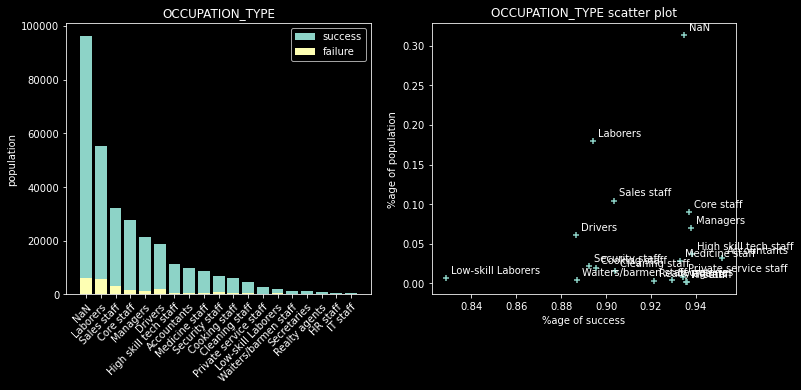

In [35]:
data_plotting(app_train,'OCCUPATION_TYPE',ratio_pop_max=0.99)

<ins>Observations:</ins> As expected, the most part of the data corresponds to a "no information provided" and concerns almost 1/3 of the total population. However we can take a look to the other ones:  
- Laborers represent the most populated category but is not among the safer ones.
- The riskiest borrowers categories (s/f <= 0.90) are majoritary low-skill or not-so-well-paid jobs:  
    &rarr; Laborers, Sales staff, Drivers, Security staff, Cooking staff, Cleaning staff, Low-skill Laborers, Waiters/barmen staff
- The safiest borrowers categories (s/f > 0.90) are majoritary high-skill or well-paid jobs:  
   &rarr; Core staff, Managers, High skill tech staff, Accountants, Medicine staff, Private service staff
- Without surprise, the safiest category among the safer ones is Accountant. They probably have the best budgethandling skills.

Married, popul.: 196432, pop/total ratio: 0.64, success: 181582, failure: 14850, s/f ratio: 0.92/0.08
Single / not married, popul.: 45444, pop/total ratio: 0.15, success: 40987, failure: 4457, s/f ratio: 0.90/0.10
Civil marriage, popul.: 29775, pop/total ratio: 0.10, success: 26814, failure: 2961, s/f ratio: 0.90/0.10
Separated, popul.: 19770, pop/total ratio: 0.06, success: 18150, failure: 1620, s/f ratio: 0.92/0.08
Widow, popul.: 16088, pop/total ratio: 0.05, success: 15151, failure: 937, s/f ratio: 0.94/0.06
Unknown, popul.: 2, pop/total ratio: 0.00, success: 2, failure: 0, s/f ratio: 1.00/0.00


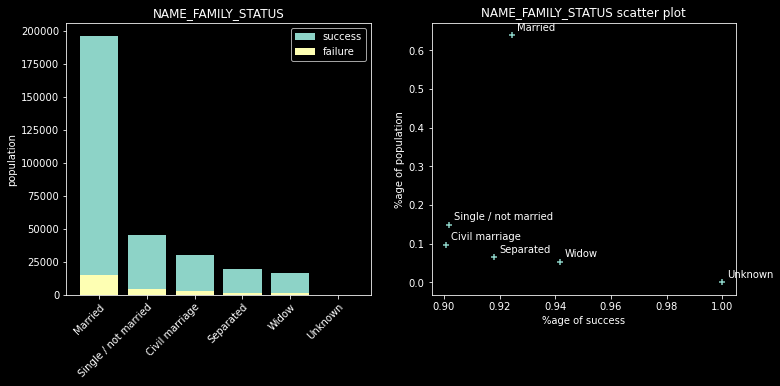

In [200]:
data_plotting(app_train,'NAME_FAMILY_STATUS')

<ins>Observations:</ins> 'Single/unmarried' and 'civil marriage only' have the worst success/failure ratio (90/10) but represent together 25% of total population. On the other hand married clients are by far the more common and not the riskiest category. The 'unknow' family status is too rare to be unbiased. 

House / apartment, popul.: 272868, pop/total ratio: 0.89, success: 251596, failure: 21272, s/f ratio: 0.92/0.08
With parents, popul.: 14840, pop/total ratio: 0.05, success: 13104, failure: 1736, s/f ratio: 0.88/0.12
Municipal apartment, popul.: 11183, pop/total ratio: 0.04, success: 10228, failure: 955, s/f ratio: 0.91/0.09
Rented apartment, popul.: 4881, pop/total ratio: 0.02, success: 4280, failure: 601, s/f ratio: 0.88/0.12
Office apartment, popul.: 2617, pop/total ratio: 0.01, success: 2445, failure: 172, s/f ratio: 0.93/0.07
Co-op apartment, popul.: 1122, pop/total ratio: 0.00, success: 1033, failure: 89, s/f ratio: 0.92/0.08


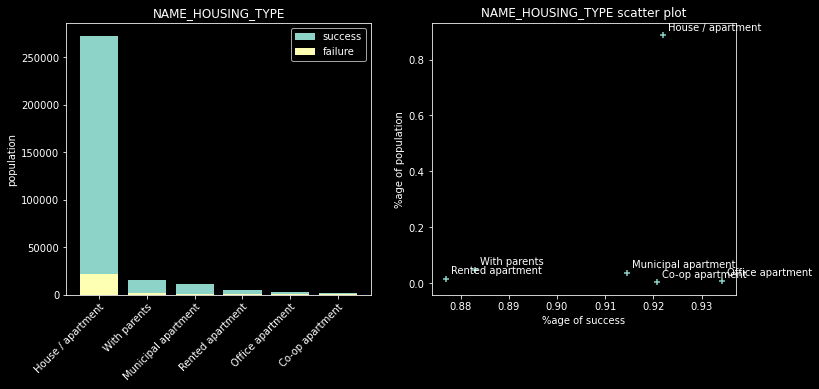

In [201]:
data_plotting(app_train,'NAME_HOUSING_TYPE')

<ins>Observations:</ins> House/apartment is among the safer categories with a success/failure ratio of 0.92/0.08 and represent the most part of the clients with 89% of total population. The fact of having to live with one's parents may not be unrelated to a certain financial fragility and therefore be associated with a greater risk of payback failure (0.88/0.12).

TUESDAY, popul.: 53901, pop/total ratio: 0.18, success: 49400, failure: 4501, s/f ratio: 0.92/0.08
WEDNESDAY, popul.: 51934, pop/total ratio: 0.17, success: 47696, failure: 4238, s/f ratio: 0.92/0.08
MONDAY, popul.: 50714, pop/total ratio: 0.16, success: 46780, failure: 3934, s/f ratio: 0.92/0.08
THURSDAY, popul.: 50591, pop/total ratio: 0.16, success: 46493, failure: 4098, s/f ratio: 0.92/0.08
FRIDAY, popul.: 50338, pop/total ratio: 0.16, success: 46237, failure: 4101, s/f ratio: 0.92/0.08
SATURDAY, popul.: 33852, pop/total ratio: 0.11, success: 31182, failure: 2670, s/f ratio: 0.92/0.08
SUNDAY, popul.: 16181, pop/total ratio: 0.05, success: 14898, failure: 1283, s/f ratio: 0.92/0.08


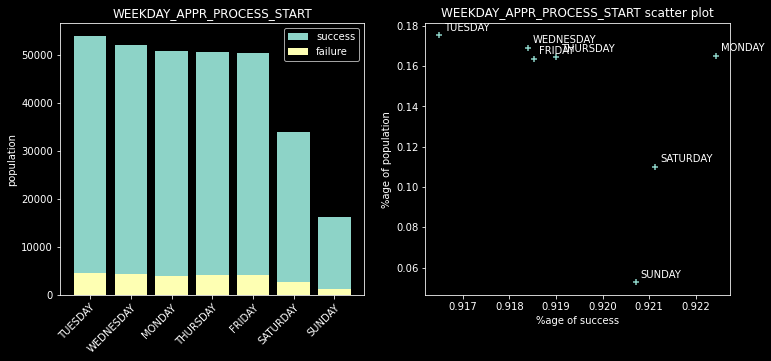

In [202]:
data_plotting(app_train,'WEEKDAY_APPR_PROCESS_START')

<ins>Observations:</ins> At first sight this feature doesn't give conclusive information except the busiest days (mainly during working days). The scatter plot shows however that applications done mondays seem to have a better chance to have a successfull payback.

Cash loans, popul.: 278232, pop/total ratio: 0.90, success: 255011, failure: 23221, s/f ratio: 0.92/0.08
Revolving loans, popul.: 29279, pop/total ratio: 0.10, success: 27675, failure: 1604, s/f ratio: 0.95/0.05


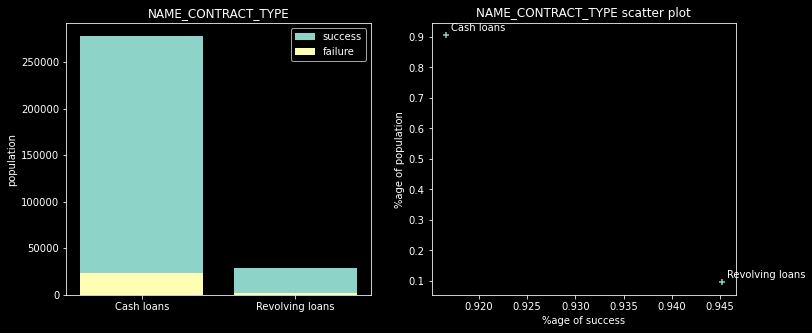

In [203]:
data_plotting(app_train,'NAME_CONTRACT_TYPE')

<ins>Observation:</ins> Revolving loans are slightly safer than cash loans but they are much less frequent as well.

F, popul.: 202448, pop/total ratio: 0.66, success: 188278, failure: 14170, s/f ratio: 0.93/0.07
M, popul.: 105059, pop/total ratio: 0.34, success: 94404, failure: 10655, s/f ratio: 0.90/0.10
XNA, popul.: 4, pop/total ratio: 0.00, success: 4, failure: 0, s/f ratio: 1.00/0.00


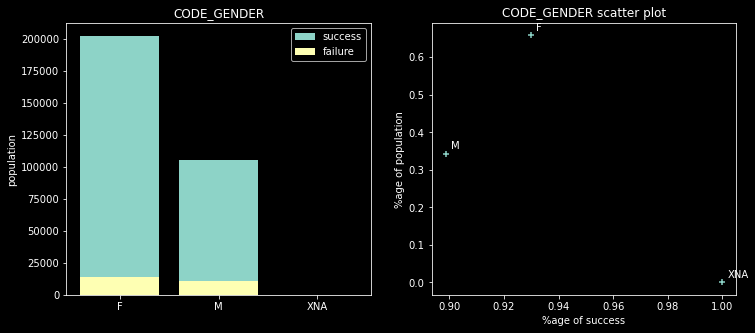

In [204]:
data_plotting(app_train,'CODE_GENDER')

<ins>Observations</ins>: Here is a good exemple of pop/total ratio usefulness: XNA gender (which actually corresponds to a string version of NaN value) has a success/failure ratio of 1.00/0.00 which means that XNA gender seems to be a very safe category, but when we look at the population/total ratio we can see that they represent a marginal part of the whole population. Their exceptional success rate can be just a lucky strike.

More relevant: female borrowers are safer and more frequent than male. As a result we can expect, all things equal otherwise, that women shall have a higher probability to get a loans compared to men.

Unaccompanied, popul.: 248526, pop/total ratio: 0.81, success: 228189, failure: 20337, s/f ratio: 0.92/0.08
Family, popul.: 40149, pop/total ratio: 0.13, success: 37140, failure: 3009, s/f ratio: 0.93/0.07
Spouse, partner, popul.: 11370, pop/total ratio: 0.04, success: 10475, failure: 895, s/f ratio: 0.92/0.08
Children, popul.: 3267, pop/total ratio: 0.01, success: 3026, failure: 241, s/f ratio: 0.93/0.07
Other_B, popul.: 1770, pop/total ratio: 0.01, success: 1596, failure: 174, s/f ratio: 0.90/0.10
NaN, popul.: 1292, pop/total ratio: 0.00, success: 1222, failure: 70, s/f ratio: 0.95/0.05
Other_A, popul.: 866, pop/total ratio: 0.00, success: 790, failure: 76, s/f ratio: 0.91/0.09
Group of people, popul.: 271, pop/total ratio: 0.00, success: 248, failure: 23, s/f ratio: 0.92/0.08


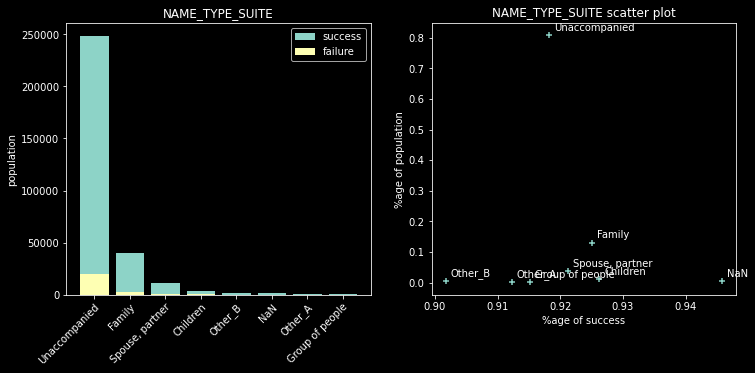

In [36]:
data_plotting(app_train,'NAME_TYPE_SUITE')

In [54]:
app_train['NAME_TYPE_SUITE'].drop_duplicates()

0        Unaccompanied
1               Family
5      Spouse, partner
8             Children
18             Other_A
64                 NaN
174            Other_B
416    Group of people
Name: NAME_TYPE_SUITE, dtype: object

In [104]:
df1=pd.DataFrame({'a':[1,2,3], 'b':[4,np.nan,6]})

In [105]:
df1

,a,b
0,1,4.0
1,2,NaN
2,3,6.0


In [108]:
df1[df1['b'].isna()]

,a,b
1,2,NaN


<ins>Observations:</ins> Single persons represent the very most part of borrowers, not the riskiest however. There is here a clear contradiction with the 'NAME_FAMILY_STATUS' feature previously seen where "married" clients were majority and "single/not married" clients among the riskiest borrowers. The worst categories here are "other_B" and "other_A" (without more precision).

#### FLAG_... features

These categorical features are explored apart the others since they probably provide binary informations.

N, popul.: 202924, pop/total ratio: 0.66, success: 185675, failure: 17249, s/f ratio: 0.91/0.09
Y, popul.: 104587, pop/total ratio: 0.34, success: 97011, failure: 7576, s/f ratio: 0.93/0.07


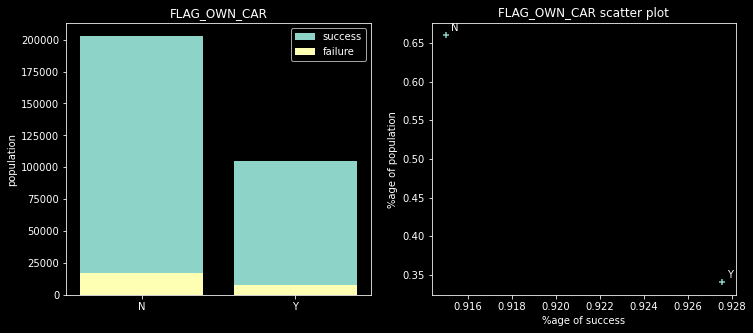

In [206]:
data_plotting(app_train,'FLAG_OWN_CAR')

<ins>Observations:</ins> Car owners are safer borrowers than non-owners (maybe because they are probably not on their first loan) but represent 1/3 of the population.

Y, popul.: 213312, pop/total ratio: 0.69, success: 196329, failure: 16983, s/f ratio: 0.92/0.08
N, popul.: 94199, pop/total ratio: 0.31, success: 86357, failure: 7842, s/f ratio: 0.92/0.08


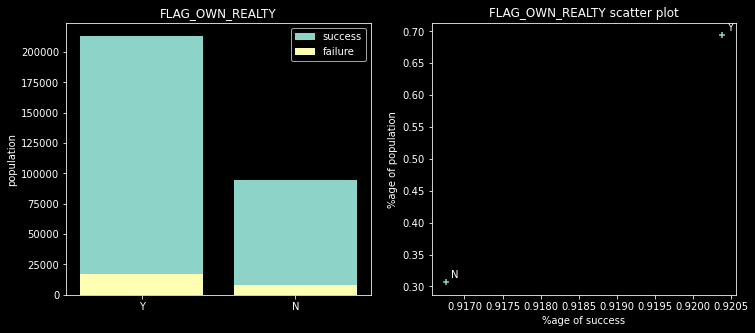

In [207]:
data_plotting(app_train,'FLAG_OWN_REALTY')

<ins>Observations:</ins> As already seen with car property, being owner of its housing seems to be an indicator of success in loan payback. However the difference with the housing is less obvious than the car.

**Conclusion**  

This first exploration of categorical data gave us some informations regarding to the safety or risk of different classes of clients.  

Not all of these categorical features seem to be relevant because: 1) the failure/success ratios are not particularly different from each other, 2) it can concern only an extremely minority part of the population, 3) the feature is intrinsically difficult to understand (unclear or splitted into too many categories, if not contradictory).  

Some features can be directly related to a certain financial fragility (resp. strength):  
- lower educations, low-skills or less-paid jobs and living with parents are generally associated with higher risk of payback failure  
- higher educations, high-skills or well-paid jobs and independant housing are generally associated with higher chance of payback success  

Anecdotally the ownership of a car seem to be related to a higher chance of payback success but the same effect is not as obvious with the ownership of the housing, marriage seem to be a plus factor but civil marriage and single/unmarried people have the same success/failure ratio, women are slightly safer borrowers than men, and revolving loans are slightly safer than cash loans (even though they only represent 10% of all credits granted).

### Int64 data

As a reminder let's take a look on the number of integer features of app_train.

In [208]:
app_train.dtypes.value_counts()

int64      41
float64    21
object     12
dtype: int64

In [209]:
# Number of unique classes in each int column
app_train.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
FLAG_WORK_PHONE                     2
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
CNT_CHILDREN                       15
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
TARGET                              2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMEN

Except for 'SK_ID_CURR' (which is a identification number so descriptive statistics will be irrelevant), 
'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH' and 'HOUR_APPR_PROCESS_START', a fair number of int64 variables seem to correspond to categorical data (e.g. all the 'FLAG_...' variables).

In [210]:
app_train[['CNT_CHILDREN', 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']].describe()

,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,-16036.995067,63815.045904,-2994.202373,12.063419
std,0.722121,4363.988632,141275.766519,1509.450419,3.265832
min,0.000000,-25229.000000,-17912.000000,-7197.000000,0.000000
25%,0.000000,-19682.000000,-2760.000000,-4299.000000,10.000000
50%,0.000000,-15750.000000,-1213.000000,-3254.000000,12.000000
75%,1.000000,-12413.000000,-289.000000,-1720.000000,14.000000
max,19.000000,-7489.000000,365243.000000,0.000000,23.000000


Quite obviously 'CNT_CHILDREN' corresponds to the number of children the client has. The max value of 19 is quite unusual but not strictly impossible. According to the descriptive statistics this entry will be probably seen as an outlier.  

All DAYS_[...] features are given in days and in negative values:  
- DAYS_BIRTH = client's age in days at the time of application  
- DAYS_EMPLOYED = how many days before the application the person started current employment  
- DAYS_ID_PUBLISH = how many days before the application did client change the identity document with which he applied for the loan  

It might be pertinent to convert them in positive years for readibility purpose.  
Finally there are obvious aberant values for 'DAYS_EMPLOYED' since 365243 days equal one thousand years.

#### Number of children

In [211]:
# Possible numbers of clients' children
app_train['CNT_CHILDREN'].drop_duplicates().sort_values().to_numpy()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 19],
      dtype=int64)

Some clients do have a lot of children.

0, popul.: 215371, pop/total ratio: 0.70, success: 198762, failure: 16609, s/f ratio: 0.92/0.08
1, popul.: 61119, pop/total ratio: 0.20, success: 55665, failure: 5454, s/f ratio: 0.91/0.09
2, popul.: 26749, pop/total ratio: 0.09, success: 24416, failure: 2333, s/f ratio: 0.91/0.09
3, popul.: 3717, pop/total ratio: 0.01, success: 3359, failure: 358, s/f ratio: 0.90/0.10


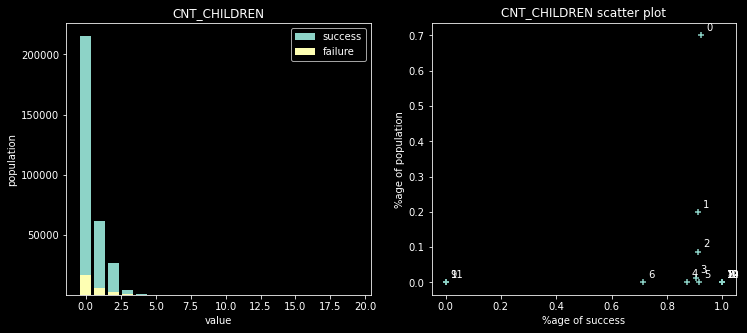

In [212]:
data_plotting(app_train, 'CNT_CHILDREN', ratio_pop_max=0.999)

<ins>Observations:</ins> The overwhelming majority of borrowers (70%) doesn't have children. They are the safest category as well. Almost all of the remaining borrowers have very few children: one child (20%) or two children (9%). Clients with 3 children are already almost negligible (1%). Larger familly can have better or worse success/failure ratios but they are definitely too rare to be statisticaly reliable.

#### Hour of application

10, popul.: 37722, pop/total ratio: 0.12, success: 34696, failure: 3026, s/f ratio: 0.92/0.08
11, popul.: 37229, pop/total ratio: 0.12, success: 34223, failure: 3006, s/f ratio: 0.92/0.08
12, popul.: 34233, pop/total ratio: 0.11, success: 31406, failure: 2827, s/f ratio: 0.92/0.08
13, popul.: 30959, pop/total ratio: 0.10, success: 28474, failure: 2485, s/f ratio: 0.92/0.08
14, popul.: 27682, pop/total ratio: 0.09, success: 25493, failure: 2189, s/f ratio: 0.92/0.08
9, popul.: 27384, pop/total ratio: 0.09, success: 25137, failure: 2247, s/f ratio: 0.92/0.08
15, popul.: 24839, pop/total ratio: 0.08, success: 22953, failure: 1886, s/f ratio: 0.92/0.08
16, popul.: 20385, pop/total ratio: 0.07, success: 18864, failure: 1521, s/f ratio: 0.93/0.07
8, popul.: 15127, pop/total ratio: 0.05, success: 13754, failure: 1373, s/f ratio: 0.91/0.09
17, popul.: 14900, pop/total ratio: 0.05, success: 13933, failure: 967, s/f ratio: 0.94/0.06


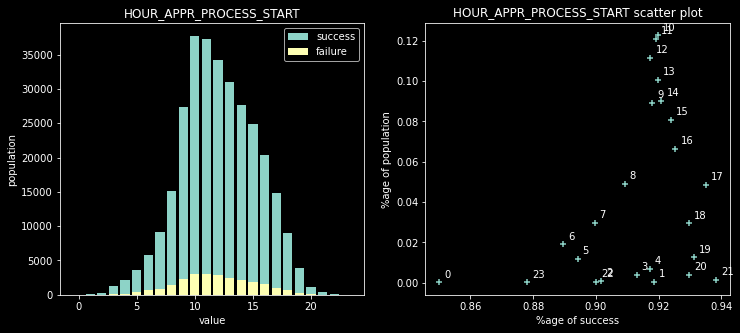

In [213]:
data_plotting(app_train, 'HOUR_APPR_PROCESS_START', ratio_pop_max=0.90)

#### DAYS_... features

These features includes a lot of unique values. Direct histograms and scatter plots are not the best way to handle them with the success vs failure distinction. Binned histograms and a kernel density estimator approach are preferable. Plus as we already saw they are given in negative days from the beginning of the application, hence a conversion in positive years will be usefull to gain in readibility.  

As a reminder:  
- DAYS_BIRTH &rarr; 17460 unique values  
- DAYS_EMPLOYED &rarr; 12574 unique values  
- DAYS_ID_PUBLISH &rarr; 6168 unique values

#### Clients' age (i.e. DAYS_BIRTH feature)

Initialy the client's age in days at the time of application.  
For this first DAYS_... feature we will show intermediate results during the data treatments but it will be commented for the other ones to lighten the notebook.

In [214]:
# Conversion in years (+ basic stats description)
age_client = app_train['DAYS_BIRTH'] / -365
age_client.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [215]:
# Age information into a separate dataframe
age_data = pd.DataFrame({'TARGET':app_train['TARGET'], 'AGE_CLIENT':age_client})
age_data.head()

,TARGET,AGE_CLIENT
0,1,25.920548
1,0,45.931507
2,0,52.180822
3,0,52.068493
4,0,54.608219


In [216]:
# Bin the ages
age_data['AGE_BINNED'] = pd.cut(age_data['AGE_CLIENT'], bins = np.linspace(20,70,num=11))
age_data.head()

,TARGET,AGE_CLIENT,AGE_BINNED
0,1,25.920548,"(25.0, 30.0]"
1,0,45.931507,"(45.0, 50.0]"
2,0,52.180822,"(50.0, 55.0]"
3,0,52.068493,"(50.0, 55.0]"
4,0,54.608219,"(50.0, 55.0]"


In [217]:
age_groups = age_data.value_counts(subset='AGE_BINNED', sort=False)
age_groups.head()

AGE_BINNED
(20.0, 25.0]    12159
(25.0, 30.0]    32862
(30.0, 35.0]    39440
(35.0, 40.0]    42868
(40.0, 45.0]    41406
dtype: int64

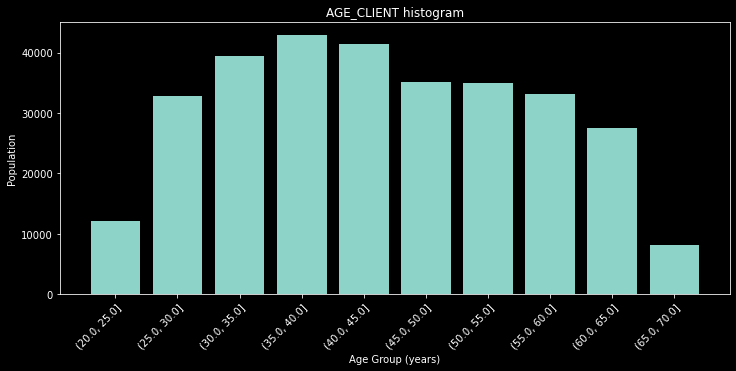

In [218]:
plt.figure(figsize = (12, 5))
fig = plt.subplot()

# Graph the age bins
fig.bar(age_groups.index.astype(str), age_groups)

# Plot labeling
fig.set_xticklabels(age_groups.index.astype(str), rotation=45, rotation_mode="anchor", ha="right")
fig.set_xlabel('Age Group (years)')
fig.set_ylabel('Population')
fig.set_title('AGE_CLIENT histogram')
plt.show()

Most of the borrowers are between 25 and 65 years old (which is not a really restrictive information). A slight augmentation of population is however observed between 30 and 45 years old.

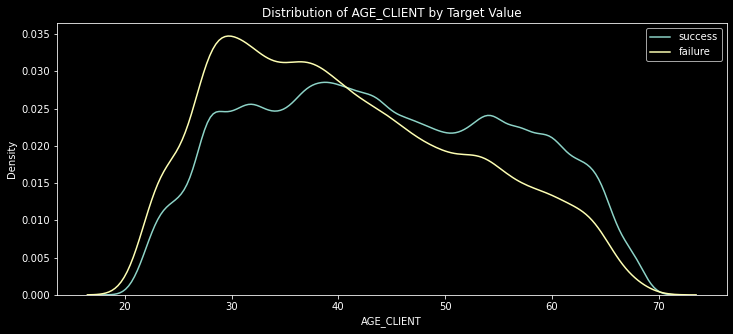

In [219]:
plt.figure(figsize = (12, 5))

# plot repaid loans
sns.kdeplot(age_data.loc[age_data['TARGET'] == 0, 'AGE_CLIENT'], label = 'success')
# plot loans that were not repaid
sns.kdeplot(age_data.loc[age_data['TARGET'] == 1, 'AGE_CLIENT'], label = 'failure')
    
# Label the plots
plt.title('Distribution of %s by Target Value' % 'AGE_CLIENT')
plt.xlabel('%s' % 'AGE_CLIENT')
plt.ylabel('Density')
plt.legend()
plt.show()

Here we can notice a clear trend in payback failure for the younger clients compared to the older ones. In other words, if there is a failure it's more probable that the client is in his early age. The trend is observed as soon as the 20ies and there is a clear pick around 30y.o. Success surpasses failure at the age of 40.

In [220]:
age_groups_fail  = age_data.groupby('AGE_BINNED').mean()
age_groups_fail

,TARGET,AGE_CLIENT
AGE_BINNED,,
"(20.0, 25.0]",0.123036,23.377522
"(25.0, 30.0]",0.111436,27.822518
"(30.0, 35.0]",0.102814,32.479037
"(35.0, 40.0]",0.089414,37.555913
"(40.0, 45.0]",0.078491,42.459346
"(45.0, 50.0]",0.074171,47.462741
"(50.0, 55.0]",0.066968,52.593136
"(55.0, 60.0]",0.055314,57.491131
"(60.0, 65.0]",0.052737,62.412459


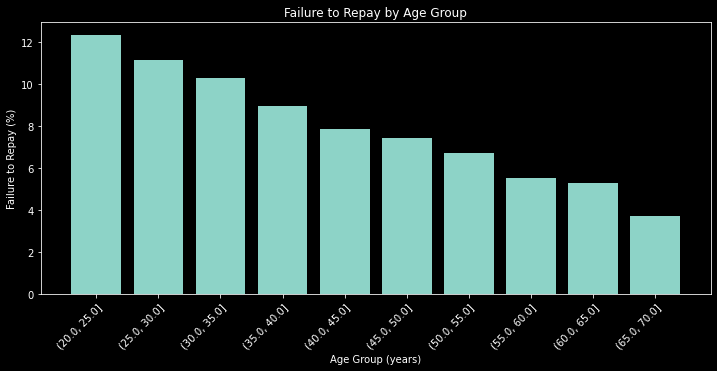

In [221]:
plt.figure(figsize = (12, 5))
fig = plt.subplot()

# Graph the age bins and the average of the target as a bar plot
fig.bar(age_groups_fail.index.astype(str), 100 * age_groups_fail['TARGET'])

# Plot labeling
fig.set_xticklabels(age_groups_fail.index.astype(str), rotation=45, rotation_mode="anchor", ha="right")
fig.set_xlabel('Age Group (years)')
fig.set_ylabel('Failure to Repay (%)')
fig.set_title('Failure to Repay by Age Group')
plt.show()

As we can see here there is a clear trend of improving paybacks as the client gets older and older.

#### Clients' employment (i.e. DAYS_EMPLOYED feature)

Initialy how many days before the application the person started *current* employment.

In [222]:
# Conversion in years (+ basic stats description)
employment = app_train['DAYS_EMPLOYED'] / -365
employment.describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

As seen before there are anomalous values for this feature. No employment duration should be negative.

In [223]:
# Negative values for employment feature
employment.where(employment<0).dropna().drop_duplicates()

8   -1000.665753
Name: DAYS_EMPLOYED, dtype: float64

It's the same value for all the aberrant ones.

In [224]:
# Total number of anomalous value
print('Total number of anomalous entries:',len(employment.where(employment<0).dropna()))
print('Ratio to the total population: %0.2f %%'%(len(employment.where(employment<0).dropna())/ len(employment)))

Total number of anomalous entries: 55374
Ratio to the total population: 0.18 %


These anomalous entries represent almost 20% of the column.

In [225]:
# temporary fixing by replacing all negative values by NaN
employment=employment.mask(employment<0)

In [226]:
employment.describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [227]:
# Employment information into a separate dataframe
employment_data = pd.DataFrame({'TARGET':app_train['TARGET'], 'EMPLOYMENT':employment})
#employment_data.head()

In [228]:
# Bin the employments
employment_data['EMPLOYMENT_BINNED'] = pd.cut(employment_data['EMPLOYMENT'], bins = np.linspace(0,50,num=11))
#employment_data.head()

In [229]:
employment_groups  = employment_data.value_counts(subset='EMPLOYMENT_BINNED', sort=False)
#employment_groups

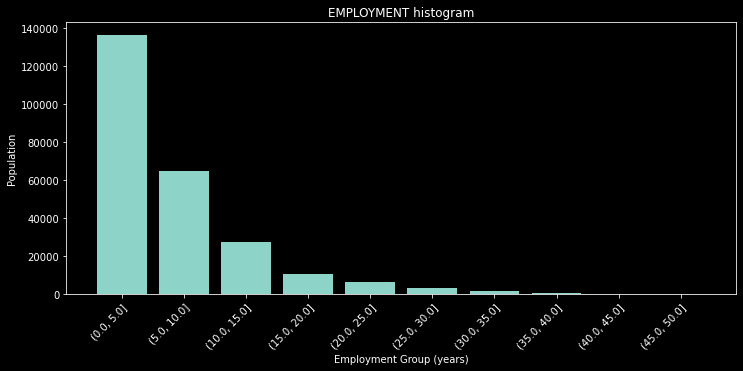

In [230]:
plt.figure(figsize = (12, 5))
fig = plt.subplot()

# Graph the age bins
fig.bar(employment_groups.index.astype(str), employment_groups)

# Plot labeling
fig.set_xticklabels(employment_groups.index.astype(str), rotation=45, rotation_mode="anchor", ha="right")
fig.set_xlabel('Employment Group (years)')
fig.set_ylabel('Population')
fig.set_title('EMPLOYMENT histogram')
plt.show()

Basically speaking there is a clear trend here : the longer the client is employed in his current job and the less he is susceptible to apply for a loan. It may be linked to the fact that the longer he is employed and the more he is financialy independant and thus the less he feel the urge for 'outer' money.

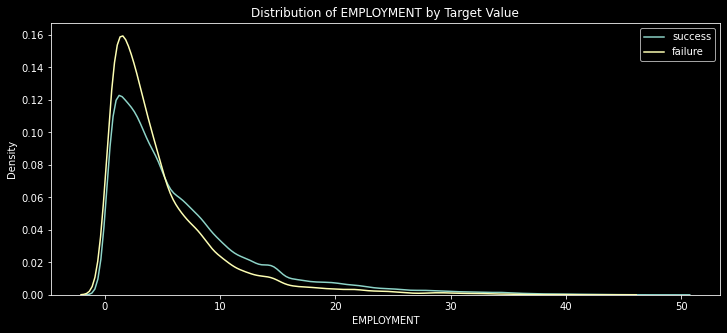

In [231]:
plt.figure(figsize = (12, 5))

# plot repaid loans
sns.kdeplot(employment_data.loc[employment_data['TARGET'] == 0, 'EMPLOYMENT'], label = 'success')
# plot loans that were not repaid
sns.kdeplot(employment_data.loc[employment_data['TARGET'] == 1, 'EMPLOYMENT'], label = 'failure')
    
# Label the plots
plt.title('Distribution of %s by Target Value' % 'EMPLOYMENT')
plt.xlabel('%s' % 'EMPLOYMENT')
plt.ylabel('Density')
plt.legend()
plt.show()

In [232]:
employment_groups_fail  = employment_data.groupby('EMPLOYMENT_BINNED').mean()
#employment_groups_fail

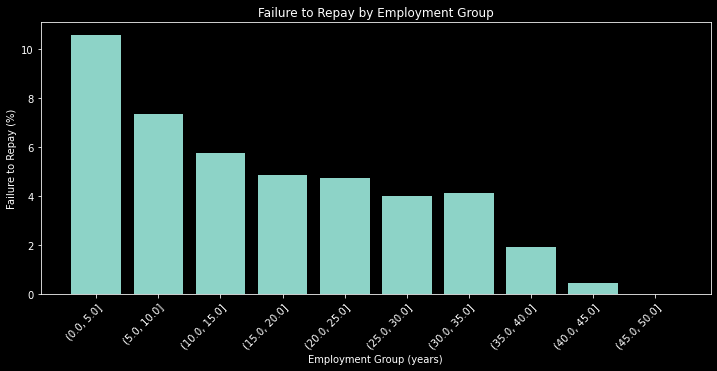

In [233]:
plt.figure(figsize = (12, 5))
fig = plt.subplot()

# Graph the age bins and the average of the target as a bar plot
fig.bar(employment_groups_fail.index.astype(str), 100 * employment_groups_fail['TARGET'])

# Plot labeling
fig.set_xticklabels(employment_groups_fail.index.astype(str), rotation=45, rotation_mode="anchor", ha="right")
fig.set_xlabel('Employment Group (years)')
fig.set_ylabel('Failure to Repay (%)')
fig.set_title('Failure to Repay by Employment Group')
plt.show()

Sadly the recent employed clients are the riskiest as well (youngness? professionnal unstability?). The KDE and the last bar chart show a clear over-representation of payback failures for employees under five years in their current job.

#### ID's 'age' (i.e. DAYS_ID_PUBLISH)

Initialy how many days before the application did client change the identity document with which he applied for the loan

In [234]:
# Conversion in years (+ basic stats description)
id_age = app_train['DAYS_ID_PUBLISH'] / -365
id_age.describe()

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

In [235]:
# ID information into a separate dataframe
id_age_data = pd.DataFrame({'TARGET':app_train['TARGET'], 'ID_AGE':id_age})
#id_age_data.head()

In [236]:
# Bin the ID's ages
id_age_data['ID_AGE_BINNED'] = pd.cut(id_age_data['ID_AGE'], bins = np.linspace(0,20,num=11))
#id_age_data.head()

In [237]:
id_age_groups  = id_age_data.value_counts(subset='ID_AGE_BINNED', sort=False)

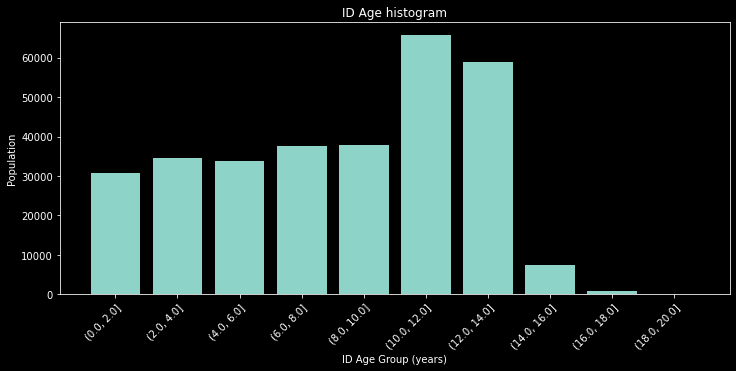

In [238]:
plt.figure(figsize = (12, 5))
fig = plt.subplot()

# Graph the registration bins
fig.bar(id_age_groups.index.astype(str), id_age_groups)

# Plot labeling
fig.set_xticklabels(id_age_groups.index.astype(str), rotation=45, rotation_mode="anchor", ha="right")
fig.set_xlabel('ID Age Group (years)')
fig.set_ylabel('Population')
fig.set_title('ID Age histogram')
plt.show()

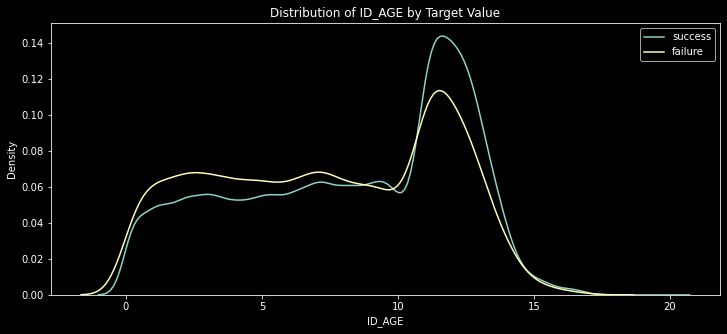

In [239]:
plt.figure(figsize = (12, 5))

# plot repaid loans
sns.kdeplot(id_age_data.loc[id_age_data['TARGET'] == 0, 'ID_AGE'], label = 'success')
# plot loans that were not repaid
sns.kdeplot(id_age_data.loc[id_age_data['TARGET'] == 1, 'ID_AGE'], label = 'failure')
    
# Label the plots
plt.title('Distribution of %s by Target Value' % 'ID_AGE')
plt.xlabel('%s' % 'ID_AGE')
plt.ylabel('Density')
plt.legend()
plt.show()

In [240]:
id_age_groups_fail  = id_age_data.groupby('ID_AGE_BINNED').mean()
#id_age_groups_fail # uncomment this line if needed

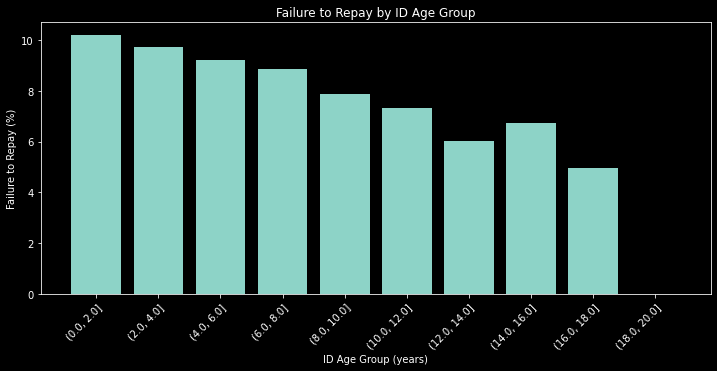

In [241]:
plt.figure(figsize = (12, 5))
fig = plt.subplot()

# Graph the age bins and the average of the target as a bar plot
fig.bar(id_age_groups_fail.index.astype(str), 100 * id_age_groups_fail['TARGET'])

# Plot labeling
fig.set_xticklabels(id_age_groups_fail.index.astype(str), rotation=45, rotation_mode="anchor", ha="right")
fig.set_xlabel('ID Age Group (years)')
fig.set_ylabel('Failure to Repay (%)')
fig.set_title('Failure to Repay by ID Age Group')
plt.show()

The trend to use quite 'old' ID documents is pretty surprising and hardly comprehensible. This is observed for success clients and failure clients as well. Why is there this pick around 12 years? The fact is it doesn't seem to have a real impact on failure to repay as the last histogram shows: the general trend of failure to repay by ID age group is decreasing and the most populated groups (between 10 and 14 years) are in the continuity of the decrease.

#### Geographical features

Some features are regionaly defined. Two of them correspond to a rating proper to HomeCredit, the other ones correspond to categorical data (like the FLAG_... features seen hereafter).

In [242]:
geog_features=['REGION_RATING_CLIENT',
               'REGION_RATING_CLIENT_W_CITY',
               'REG_REGION_NOT_LIVE_REGION',
               'REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION',
               'REG_CITY_NOT_LIVE_CITY',
               'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY']

In [243]:
for i in enumerate(geog_features):
    print('%s unique values: %s'%(i[1], app_train[i[1]].drop_duplicates().sort_values().to_numpy()))

REGION_RATING_CLIENT unique values: [1 2 3]
REGION_RATING_CLIENT_W_CITY unique values: [1 2 3]
REG_REGION_NOT_LIVE_REGION unique values: [0 1]
REG_REGION_NOT_WORK_REGION unique values: [0 1]
LIVE_REGION_NOT_WORK_REGION unique values: [0 1]
REG_CITY_NOT_LIVE_CITY unique values: [0 1]
REG_CITY_NOT_WORK_CITY unique values: [0 1]
LIVE_CITY_NOT_WORK_CITY unique values: [0 1]


In [244]:
len(app_train['REG_REGION_NOT_LIVE_REGION'].drop_duplicates().to_numpy())

2

#### REGION_RATING_CLIENT features

Initialy it corresponds to "our rating of the region where client lives (1,2,3)" without more precision.

##### Without taking into account the client's city

2, popul.: 226984, pop/total ratio: 0.74, success: 209077, failure: 17907, s/f ratio: 0.92/0.08
3, popul.: 48330, pop/total ratio: 0.16, success: 42964, failure: 5366, s/f ratio: 0.89/0.11
1, popul.: 32197, pop/total ratio: 0.10, success: 30645, failure: 1552, s/f ratio: 0.95/0.05


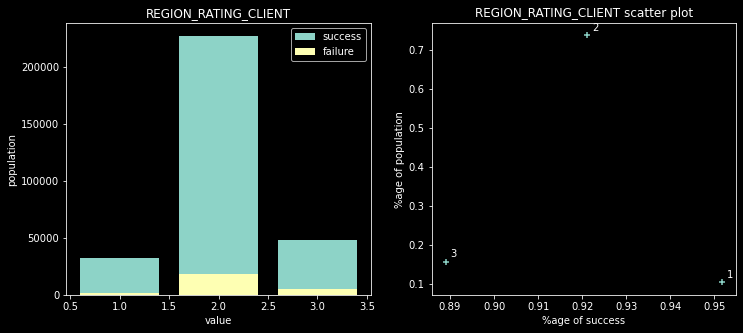

In [245]:
data_plotting(app_train, 'REGION_RATING_CLIENT', ratio_pop_max=1.00)

#### Taking into account the client's city

2, popul.: 229484, pop/total ratio: 0.75, success: 211314, failure: 18170, s/f ratio: 0.92/0.08
3, popul.: 43860, pop/total ratio: 0.14, success: 38859, failure: 5001, s/f ratio: 0.89/0.11
1, popul.: 34167, pop/total ratio: 0.11, success: 32513, failure: 1654, s/f ratio: 0.95/0.05


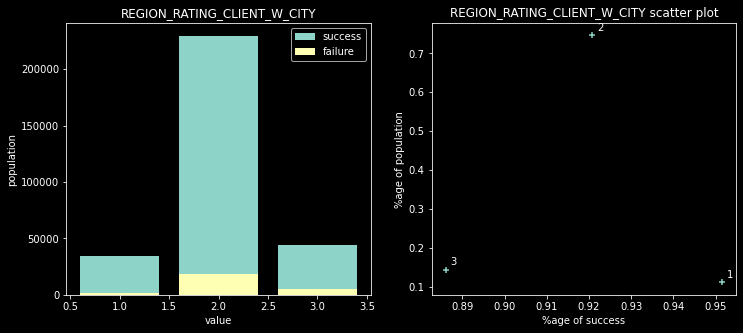

In [246]:
data_plotting(app_train, 'REGION_RATING_CLIENT_W_CITY', ratio_pop_max=1.00)

Taking into account the client's city or not doesn't seem to have a real impact on the general result. Most of the clients are rated '2', success/failure ratios are basically the same between the two features for each grade, only the relative populations are slightly impacted. The lack of information about these features doesn't help to understand what they really mean.

##### Geographical flag features

In [247]:
# First extract of the 'geographical features
geog_features_list=list()
for i in app_train.columns:
    if ('REGION' in i or 'CITY' in i) and (len(app_train[i].drop_duplicates())==2):
        geog_features_list.append(i)
        
geog_features=app_train[geog_features_list]

In [248]:
geog_features_list

['REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [249]:
# Add of the 'TARGET' feature
geog_features['TARGET']=app_train['TARGET']

In [250]:
# Compute pairwise correlations
correlation_geog=geog_features.corr(method='pearson')

In [251]:
# Keep absolute correlations to TARGET only
abs_corr_geog=abs(correlation_geog.loc['TARGET'].drop(index='TARGET')).sort_values(ascending=False)
abs_corr_geog

REG_CITY_NOT_WORK_CITY         0.050994
REG_CITY_NOT_LIVE_CITY         0.044395
LIVE_CITY_NOT_WORK_CITY        0.032518
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
LIVE_REGION_NOT_WORK_REGION    0.002819
Name: TARGET, dtype: float64

The absolute correlations of geographical flag features with the TARGET are extremely weak.

In [252]:
# extract sorted index for ploting purpose
abs_corr_geog_list=abs_corr_geog.index.to_list()

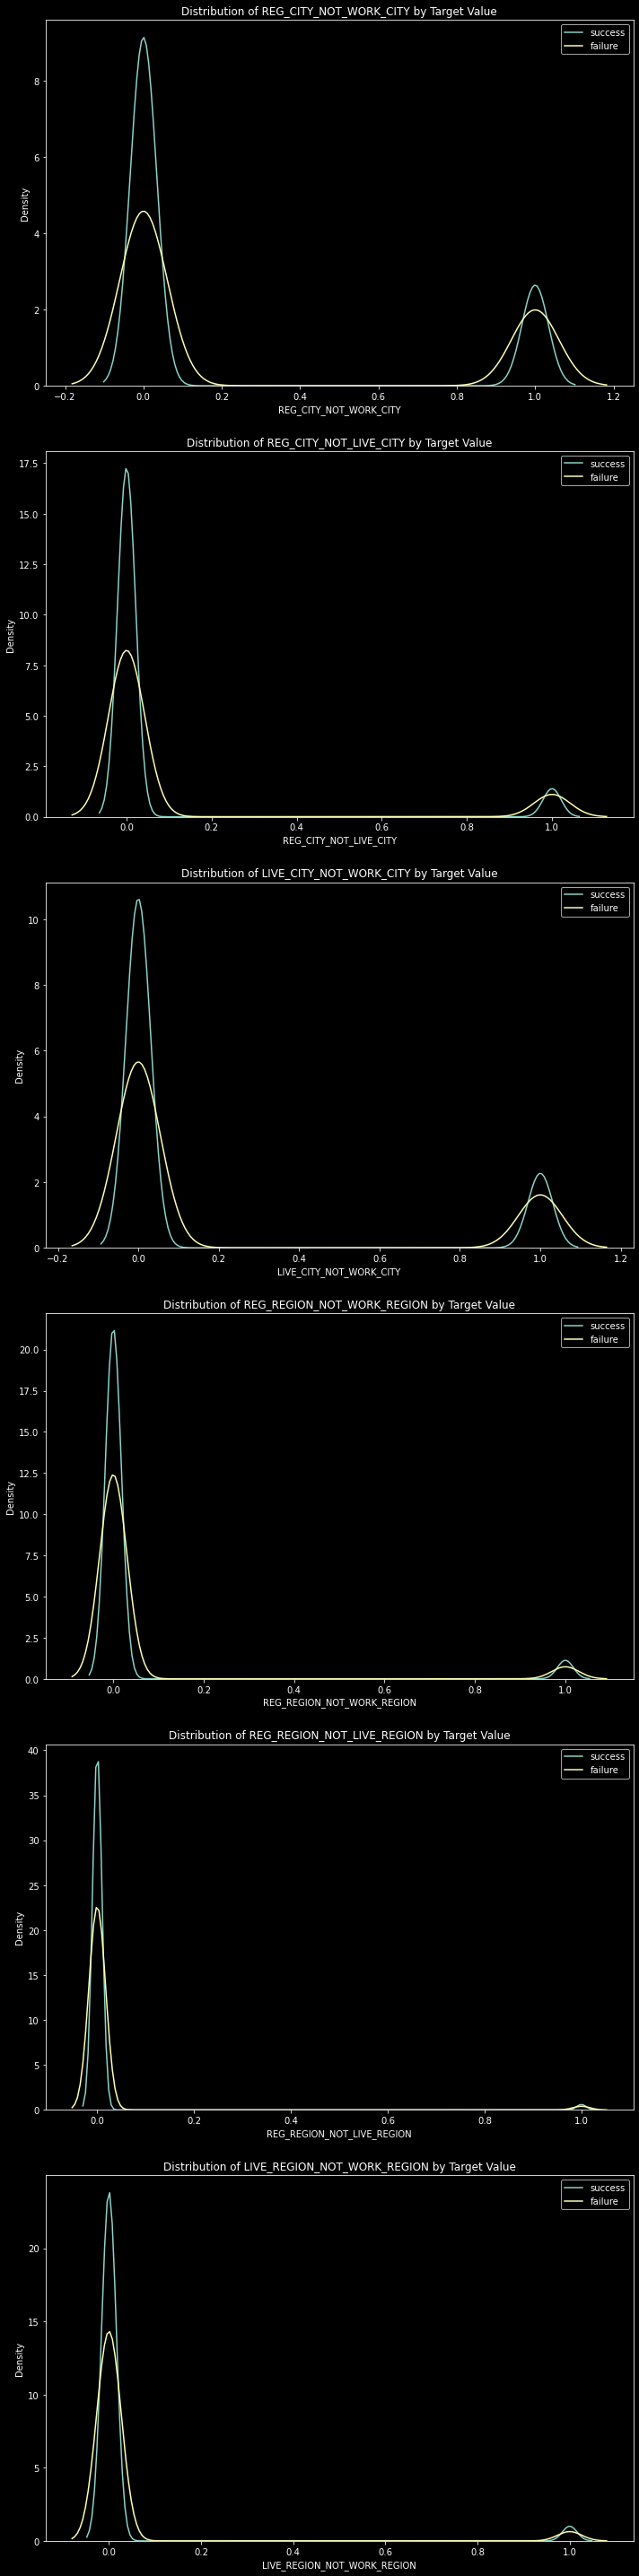

In [253]:
plt.figure(figsize = (10, 40))

# iterate through the sources
for i, source in enumerate(abs_corr_geog_list):
    
    # create a new subplot for each source
    plt.subplot(len(geog_features_list), 1, i + 1)
    # plot repaid loans
    sns.kdeplot(geog_features.loc[geog_features['TARGET'] == 0, source], label = 'success')
    # plot loans that were not repaid
    sns.kdeplot(geog_features.loc[geog_features['TARGET'] == 1, source], label = 'failure')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)
plt.show()

<ins>Observations:</ins> (Features sorted by decreassing correlation with the TARGET.)

- REG_CITY_NOT_WORK_CITY: clients who work in the same city as their permanent adress are safer than those who don't.  
- REG_CITY_NOT_LIVE_CITY: clients who live in the same city as their permanent adress are safer than those who don't.  
- LIVE_CITY_NOT_WORK_CITY: clients who live in the same city as they work are safer than those who don't.  
- REG_REGION_NOT_WORK_REGION: clients who work in the same region as their permanent adress are safer than those who don't.  
- REG_REGION_NOT_LIVE_REGION: clients who live in the same region as their permanent adress are safer than those who don't.  
- LIVE_REGION_NOT_WORK_REGION: clients who live in the same region as they work are safer than whose don't.  

Generally speaking, the direct proximity of the residency place and the working place seems to be an indicator of a better repayment probability. Nevertheless, it should be kept in mind that these features are very losely correlated to the TARGET.

#### FLAG_... features

As seen in the list of features given in the beginning of this section, there are a lot of 'FLAG_...' features. In the same way of 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' or the regional flag features already seen in the previously, these features give 'binary' information about the client. It might be more efficient to take a general look of these features by a pairwise correlation and more importantly their possible link to the TARGET feature.  

**/!\ Correlation is not reason /!\**  
Just because the variable is correlated does not strictly mean that it *will be* useful. It is just an indicator to make a first selection.

In [254]:
# First extract of the 'FLAG_...' features
flag_features_list=list()
for i in app_train.columns:
    if 'FLAG_' in i:
        flag_features_list.append(i)
        
flag_features=app_train[flag_features_list]

In [255]:
# Remove 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' already explored
for i in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    flag_features_list.remove(i)
    print('%s in flag_features_list: %s'%(i, i in flag_features_list))

FLAG_OWN_CAR in flag_features_list: False
FLAG_OWN_REALTY in flag_features_list: False


In [256]:
# Add of the 'TARGET' feature
flag_features['TARGET']=app_train['TARGET']

In [257]:
# Compute pairwise correlations
correlation=flag_features.corr(method='pearson')

In [258]:
# Keep correlations to TARGET only
main_flags=abs(correlation.loc['TARGET'].drop(index='TARGET')).sort_values(ascending=False).head(10)
main_flags

FLAG_EMP_PHONE      0.045982
FLAG_DOCUMENT_3     0.044346
FLAG_DOCUMENT_6     0.028602
FLAG_WORK_PHONE     0.028524
FLAG_PHONE          0.023806
FLAG_DOCUMENT_16    0.011615
FLAG_DOCUMENT_13    0.011583
FLAG_DOCUMENT_14    0.009464
FLAG_DOCUMENT_8     0.008040
FLAG_DOCUMENT_18    0.007952
Name: TARGET, dtype: float64

In [259]:
# List of the index
main_flag_features=main_flags.index.to_list()

In [260]:
# Select the corresponding data in flag_features
flags_selection=flag_features[main_flag_features]

In [261]:
# Restore TARGET column for ploting purpose
flags_selection['TARGET']=app_train['TARGET']

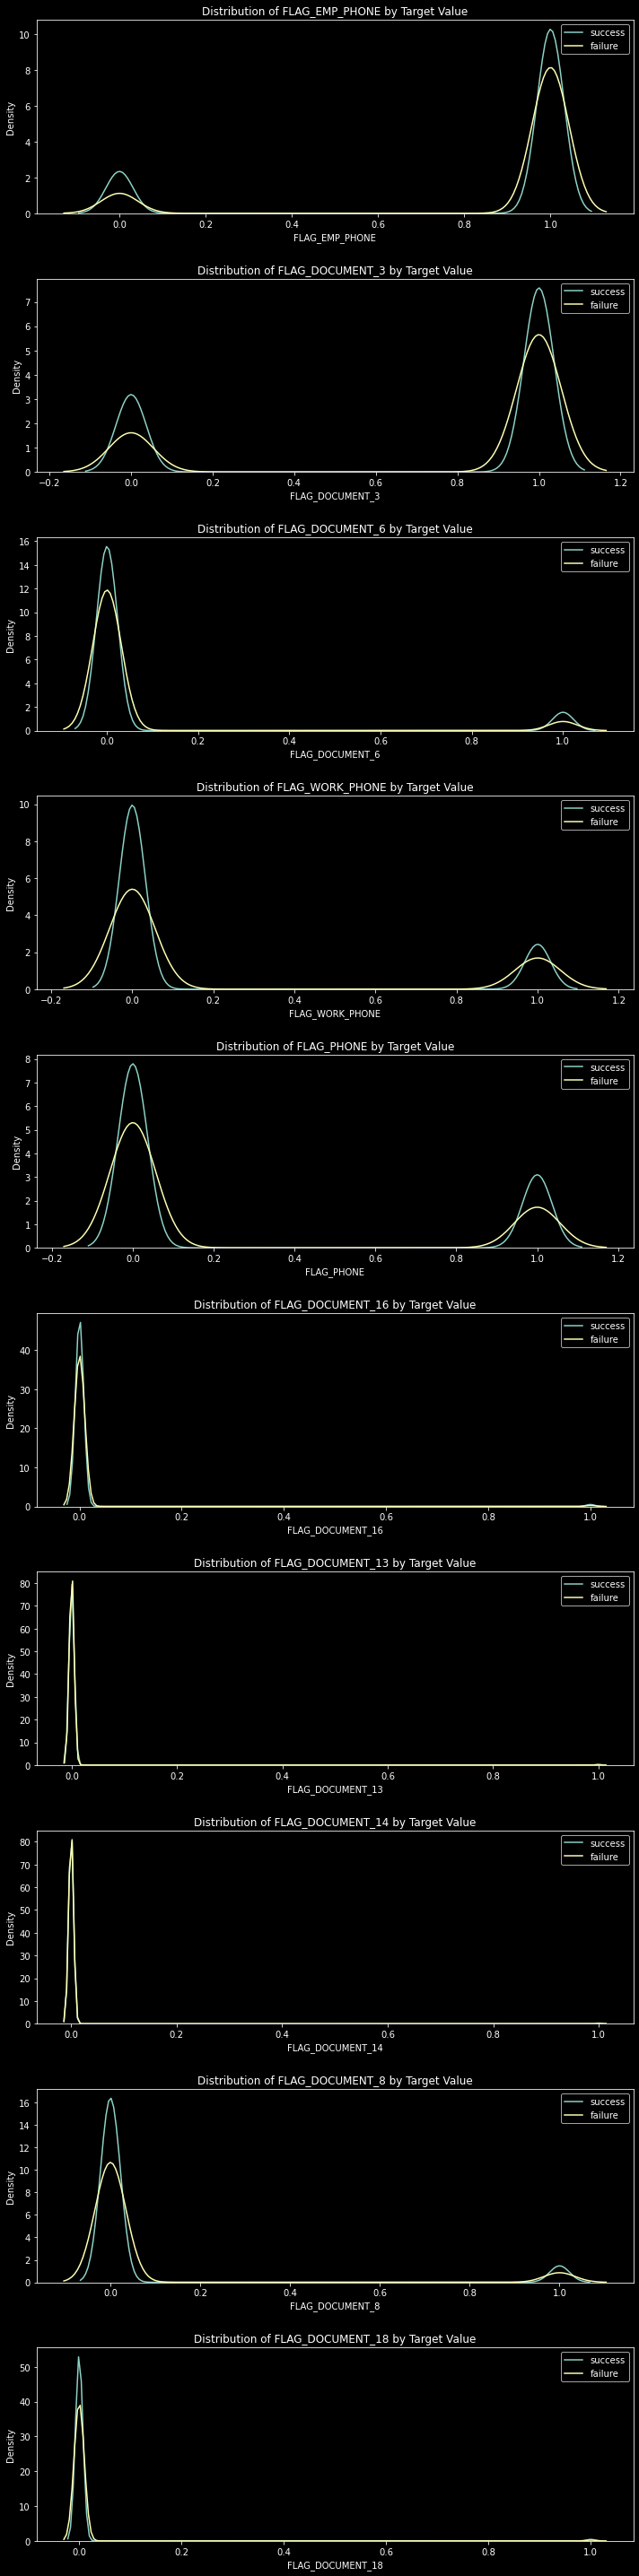

In [262]:
plt.figure(figsize = (10, 40))

# iterate through the sources
for i, source in enumerate(main_flag_features):
    
    # create a new subplot for each source
    plt.subplot(len(main_flag_features), 1, i + 1)
    # plot repaid loans
    sns.kdeplot(flags_selection.loc[flags_selection['TARGET'] == 0, source], label = 'success')
    # plot loans that were not repaid
    sns.kdeplot(flags_selection.loc[flags_selection['TARGET'] == 1, source], label = 'failure')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)
plt.show()

<ins>Observations:</ins> Except for the first two features (FLAG_EMP_PHONE and FLAG_DOCUMENT_3) where we can see that most of the clients have provided the expected information, the other ones show a lack of it both for successful and failure clients (especially for FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_16 and FLAG_DOCUMENT_18). Moreover the trend is each time the same (except perhaps for FLAG_DOCUMENT_13 and FLAG_DOCUMENT_14): successful clients are more common compared to failure ones.  

It's hard to conclude concerning these features. Moreover the absolute correlations with the TARGET are again extremely weak.

### Float64 data

As a reminder let's take a look on the number of integer features of app_train.

In [263]:
app_train.dtypes.value_counts()

int64      41
float64    21
object     12
dtype: int64

There are much more float64 features than any other type.

In [264]:
app_train.select_dtypes('float64').columns

Index(['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'EXT_SOURCE_3', 'EXT_SOURCE_1'],
      dtype='object')

In [265]:
app_train.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_CREDIT                      5603
AMT_ANNUITY                    13672
REGION_POPULATION_RELATIVE        81
DAYS_REGISTRATION              15688
CNT_FAM_MEMBERS                   17
AMT_INCOME_TOTAL                2548
DAYS_LAST_PHONE_CHANGE          3773
AMT_GOODS_PRICE                 1002
EXT_SOURCE_2                  119831
OBS_30_CNT_SOCIAL_CIRCLE          33
DEF_60_CNT_SOCIAL_CIRCLE           9
OBS_60_CNT_SOCIAL_CIRCLE          33
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_QRT         11
EXT_SOURCE_3                     814
EXT_SOURCE_1                  114584
dtype: int64

In [266]:
# First extract of the float64 features
float64_features_list=app_train.select_dtypes('float64').columns
float64_features=app_train[float64_features_list]

In [267]:
# Add of the 'TARGET' feature
float64_features['TARGET']=app_train['TARGET']

In [268]:
float64_features.head(3)

,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,...,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,EXT_SOURCE_3,EXT_SOURCE_1,TARGET
0,406597.5,24700.5,0.018801,-3648.0,1.0,202500.0,-1134.0,351000.0,0.262949,2.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.139376,0.083037,1
1,1293502.5,35698.5,0.003541,-1186.0,2.0,270000.0,-828.0,1129500.0,0.622246,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.311267,0
2,135000.0,6750.0,0.010032,-4260.0,1.0,67500.0,-815.0,135000.0,0.555912,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567,NaN,0


In [269]:
# Compute pairwise correlations
correlation_float64=float64_features.corr(method='pearson')

In [270]:
# Keep main absolutes correlations to TARGET only
main_float64=abs(correlation_float64.loc['TARGET'].drop(index='TARGET')).sort_values(ascending=False).head(10)
main_float64

EXT_SOURCE_3                  0.178919
EXT_SOURCE_2                  0.160472
EXT_SOURCE_1                  0.155317
DAYS_LAST_PHONE_CHANGE        0.055218
DAYS_REGISTRATION             0.041975
AMT_GOODS_PRICE               0.039645
REGION_POPULATION_RELATIVE    0.037227
DEF_30_CNT_SOCIAL_CIRCLE      0.032248
DEF_60_CNT_SOCIAL_CIRCLE      0.031276
AMT_CREDIT                    0.030369
Name: TARGET, dtype: float64

Generally speaking the correlations with the TARGET feature are again particularly weak (most of them don't exceed 0.05 in absolute value). Only three features present stronger correlation : EXT_SOURCE_1, EXT_SOURCE_2 and EXT_SOURCE_3. To make a proper selection it is better to keep the stronger ones regardless of their sign.

In [271]:
# List of the index
main_float64_features=main_float64.index.to_list()

In [272]:
# Descriptive statistics of selected features
app_train[main_float64_features].describe()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_CREDIT
count,246546.000000,3.068510e+05,134133.000000,307510.000000,307511.000000,3.072330e+05,307511.000000,306490.000000,306490.000000,3.075110e+05
mean,0.510853,5.143927e-01,0.502130,-962.858788,-4986.120328,5.383962e+05,0.020868,0.143421,0.100049,5.990260e+05
std,0.194844,1.910602e-01,0.211062,826.808487,3522.886321,3.694465e+05,0.013831,0.446698,0.362291,4.024908e+05
min,0.000527,8.173617e-08,0.014568,-4292.000000,-24672.000000,4.050000e+04,0.000290,0.000000,0.000000,4.500000e+04
25%,0.370650,3.924574e-01,0.334007,-1570.000000,-7479.500000,2.385000e+05,0.010006,0.000000,0.000000,2.700000e+05
50%,0.535276,5.659614e-01,0.505998,-757.000000,-4504.000000,4.500000e+05,0.018850,0.000000,0.000000,5.135310e+05
75%,0.669057,6.636171e-01,0.675053,-274.000000,-2010.000000,6.795000e+05,0.028663,0.000000,0.000000,8.086500e+05
max,0.896010,8.549997e-01,0.962693,0.000000,0.000000,4.050000e+06,0.072508,34.000000,24.000000,4.050000e+06


Some float64 features are in fact DAYS_... features discreetly slipped. There does not appear to be any anomalous data for them. A conversion in postive years would be however appreciable to improve readibility.

In [273]:
float64_selection=app_train[main_float64_features]

In [274]:
# Conversion in positive years
float64_selection['YEARS_LAST_PHONE_CHANGE']=float64_selection['DAYS_LAST_PHONE_CHANGE']/-365
float64_selection['YEARS_REGISTRATION']=float64_selection['DAYS_REGISTRATION']/-365

In [275]:
# Drop obsolete columns
float64_selection.drop(columns=['DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION'], inplace=True)

In [276]:
# Restore TARGET column for ploting purpose
float64_selection['TARGET']=app_train['TARGET']

In [277]:
# New definition of selected features
selected_features=float64_selection.columns.to_list()
selected_features.remove('TARGET')

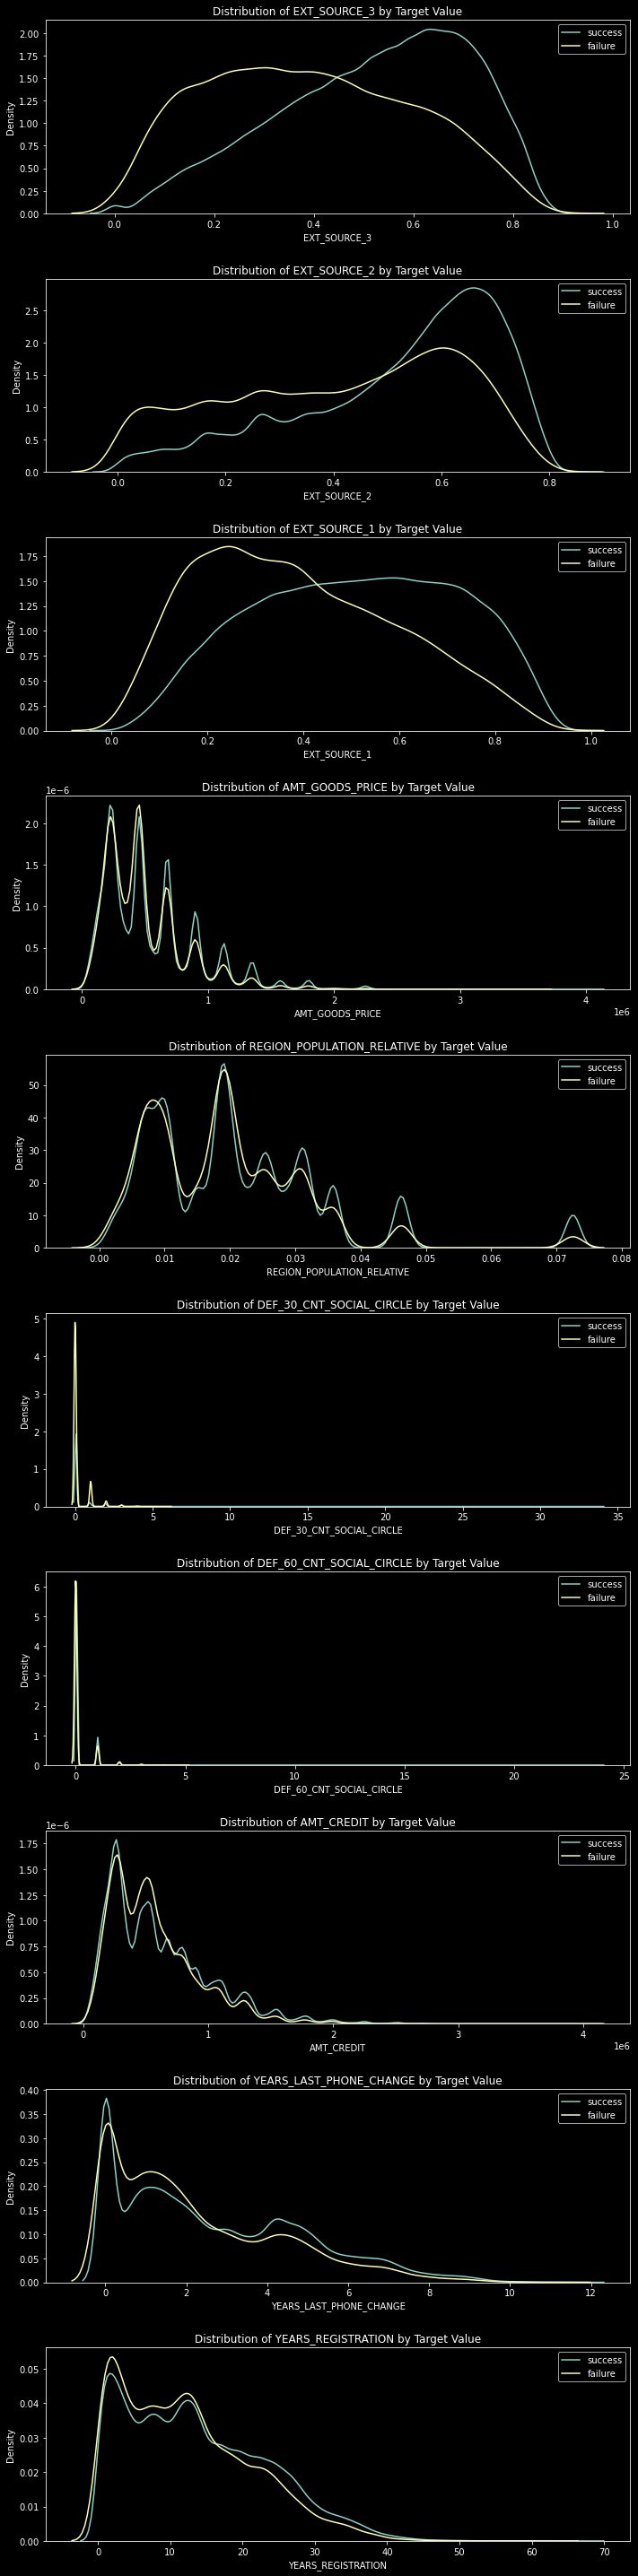

In [278]:
plt.figure(figsize = (10, 40))

# iterate through the sources
for i, source in enumerate(selected_features):
    
    # create a new subplot for each source
    plt.subplot(len(selected_features), 1, i + 1)
    # plot repaid loans
    sns.kdeplot(float64_selection.loc[float64_selection['TARGET'] == 0, source], label = 'success')
    # plot loans that were not repaid
    sns.kdeplot(float64_selection.loc[float64_selection['TARGET'] == 1, source], label = 'failure')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)
plt.show()

As one would expect in view of their absolute correlation, the EXT_SOURCE_... features (i.e. the "normalized score from external data source" as specified in the HomeCredit_columns_description file) are the most easily interpreted and one can see a real difference in the KDEs depending on the success or failure of the payback. Usually this is associated with larger values of these features (in other words: the higher, the better).  

The KDE plot of AMT_GOODS_PRICE (i.e the "goods price of good that client asked for (if applicable) on the previous application") seems to show that the higher was the previous loan application the higher is the probability of repayment success. The relative part of failure compared to success is indeed decreassing with the progression of the former goods price (after a reverse trend observed once at the beginning).

REGION_POPULATION_RELATIVE (i.e. the "normalized population of region where client lives" as specified in the HomeCredit_columns_description file) seems to show that clients living in more populated regions have a better probability to repay the loan. However the trend is not observed for the very first values (like AMT_GOODS_PRICE seen just above).  

DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are two barely readible features due to scale issues. The peaks observed at null value seem yet to show an independancy of client's social surroundings defaults (respectively on 30 and 60 days past due) with its proper hability to repay the loan. The correlation with the TARGET, even if it's weak, is thus hard to understand.  

The AMT_CREDIT feature is, just like AMT_GOODS_PRICE, pretty hard to understand. It's about the "maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)". It seems to show that a large overdue credit at application date is not necessarily synonyme of repayment failure. It is indeed rather counter-intuitive.  

The REGISTRATION feature seems to give a slight advantage to "older" clients (i.e. the ones who were registred for a longer time) compared to more recent ones. There are slightly more failures for clients registered in the last 15 years. The trend is reversing afterward and success become the slight majority.  

Finally the LAST_PHONE_CHANGE feature shows a peak of repayment success for "fresh new changes" but the trend is rapidely reversing and failure seem to be more common untill about the third anniversary. It might be related to a certain life stability.  


### Final part: quick view to the other databases

As a reminder, here is the list of all the available databases:  
- application_test  
- application_train  
- bureau  
- bureau_balance  
- credit_card_balance  
- HomeCredit_columns_description  
- installments_payments  
- POS_CASH_balance  
- previous_application  
- sample_submission

We already explored application_train and saw that application_test was of the same kind (except for the missing TARGET column). Let's have now a quick view on the other databases. This will put an end to this first exploratory notebook.  

N.B.: For reasons of memory space management, we will have to erase each database after consulting it.  

In [279]:
# Remove obsolete dataframes to free memory space
gc.enable()
del app_train
del app_test
del age_data
del employment_data
del id_age_data
del geog_features
del flag_features
del flags_selection
del float64_features, 
del float64_selection
gc.collect()

29809

#### Bureau

In [11]:
# Bureau data
bureau = pd.read_csv(os.path.abspath('bureau.csv'))
print('Bureau database shape  : ', bureau.shape)

Bureau database shape  :  (1716428, 17)


In [12]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


Most of the features are numerical but few of them are categorical (CREDIT_ACTIVE, CREDIT_CURRENCY, CREDIT_TYPE). We will have to consider an encoding when we will include them in a global dataset.

In [109]:
bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

In [111]:
bureau.select_dtypes('object').head(3)

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,Closed,currency 1,Consumer credit
1,Active,currency 1,Credit card
2,Active,currency 1,Consumer credit


In [113]:
bureau['CREDIT_ACTIVE'].drop_duplicates().to_numpy()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [114]:
bureau['CREDIT_CURRENCY'].drop_duplicates().to_numpy()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [116]:
bureau['CREDIT_TYPE'].drop_duplicates().to_numpy()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

Even if 'Unknown type of loan', 'Another type of loan' are not particularly specific we do not have XNA strictly speaking.

In [282]:
bureau.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

DAYS_CREDIT_ENDDATE        14096
DAYS_ENDDATE_FACT           2917
AMT_CREDIT_MAX_OVERDUE     68251
AMT_CREDIT_SUM            236708
AMT_CREDIT_SUM_DEBT       226537
AMT_CREDIT_SUM_LIMIT       51726
AMT_CREDIT_SUM_OVERDUE      1616
AMT_ANNUITY                40321
dtype: int64

In [285]:
bureau.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR             305811
SK_ID_BUREAU          1716428
DAYS_CREDIT              2923
CREDIT_DAY_OVERDUE        942
CNT_CREDIT_PROLONG         10
DAYS_CREDIT_UPDATE       2982
dtype: int64

In [283]:
bureau.sort_values(by=['SK_ID_CURR','SK_ID_BUREAU'], ascending=True).head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.0,0.0,0.0,Consumer credit,-6,4630.5


In [287]:
bureau.sort_values(by='SK_ID_CURR', ascending=True).drop_duplicates('SK_ID_CURR').head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.000,0.0,0.000,0.0,Consumer credit,-155,0.0
675689,100002,6158909,Active,currency 1,-103,0,NaN,NaN,40.5,0,31988.565,0.0,31988.565,0.0,Credit card,-24,0.0
1024669,100003,5885880,Active,currency 1,-606,0,1216.0,NaN,0.0,0,810000.000,0.0,810000.000,0.0,Credit card,-43,NaN
363104,100004,6829133,Closed,currency 1,-1326,0,-595.0,-683.0,NaN,0,94500.000,0.0,0.000,0.0,Consumer credit,-682,NaN
1421816,100005,6735202,Active,currency 1,-62,0,122.0,NaN,0.0,0,29826.000,25321.5,0.000,0.0,Consumer credit,-31,4261.5


At first glance this dataframe gives informations about all the clients (from application_train and application_test). Several rows can concern the same client. It seems to be about the client's history of credit/loan. There is also an additional ID column (SK_ID_BUREAU) which can be probably useful to make a link with the second "bureau related" dataframe (bureau balance).

In [288]:
# Remove the dataframe to free memory space
gc.enable()
del bureau
gc.collect()

28

#### Bureau_balance database

In [118]:
# Bureau_balance data
bureau_balance = pd.read_csv(os.path.abspath('bureau_balance.csv'))
print('Bureau_balance database shape  : ', bureau_balance.shape)

Bureau_balance database shape  :  (27299925, 3)


In [119]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [122]:
bureau_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

STATUS    8
dtype: int64

In [124]:
bureau_balance['STATUS'].drop_duplicates().to_numpy()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

Here again 'X' means 'unknown' but is not an XNA strictly speakly.

In [121]:
bureau_balance.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
dtype: int64

In [19]:
bureau_balance.head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


This dataframe gives information about the status of the loan along the months of the total engagement duration (active, closed, status unknown, possible late payments). Several rows can thus be related to the same SK_ID_BUREAU number which is uniquely linked to a given loan. This unique number will be usefull to merge the 'bureau related' dataframes with each other. Again the object type feature will need an encoding to be used bby the model.

In [293]:
# Remove the dataframe to free memory space
gc.enable()
del bureau_balance
gc.collect()

100

#### Credit_card_balance

In [126]:
# Credit_card_balance data
credit_card_balance = pd.read_csv(os.path.abspath('credit_card_balance.csv'))
print('Credit_card_balance database shape  : ', credit_card_balance.shape)

Credit_card_balance database shape  :  (3840312, 23)


In [127]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

There are slightly more features for this dataframe than for the 'bureau' one seen previously. 

In [129]:
credit_card_balance['NAME_CONTRACT_STATUS'].drop_duplicates().to_numpy()

array(['Active', 'Completed', 'Demand', 'Signed', 'Sent proposal',
       'Refused', 'Approved'], dtype=object)

No XNA value in this dataframe.

In [296]:
credit_card_balance.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_BALANCE                   1347904
AMT_DRAWINGS_ATM_CURRENT         2267
AMT_DRAWINGS_CURRENT           187005
AMT_DRAWINGS_OTHER_CURRENT       1832
AMT_DRAWINGS_POS_CURRENT       168748
AMT_INST_MIN_REGULARITY        312266
AMT_PAYMENT_CURRENT            163209
AMT_PAYMENT_TOTAL_CURRENT      182957
AMT_RECEIVABLE_PRINCIPAL      1195839
AMT_RECIVABLE                 1338878
AMT_TOTAL_RECEIVABLE          1339008
CNT_DRAWINGS_ATM_CURRENT           44
CNT_DRAWINGS_OTHER_CURRENT         11
CNT_DRAWINGS_POS_CURRENT          133
CNT_INSTALMENT_MATURE_CUM         121
dtype: int64

In [297]:
credit_card_balance.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV                 104307
SK_ID_CURR                 103558
MONTHS_BALANCE                 96
AMT_CREDIT_LIMIT_ACTUAL       181
CNT_DRAWINGS_CURRENT          129
SK_DPD                        917
SK_DPD_DEF                    378
dtype: int64

In [298]:
credit_card_balance.sort_values(by='SK_ID_CURR', ascending=True).head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
584804,1489396,100006,-1,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
1399895,1489396,100006,-4,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
520387,1489396,100006,-2,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
1636141,1489396,100006,-6,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
655566,1489396,100006,-5,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
1347528,1489396,100006,-3,0.00,270000,NaN,0.0,NaN,NaN,0.0,...,0.00,0.00,NaN,0,NaN,NaN,0.0,Active,0,0
2771280,1843384,100011,-37,0.00,180000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0,0.0,0.0,33.0,Active,0,0
3201936,1843384,100011,-31,0.00,180000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0,0.0,0.0,33.0,Active,0,0
131693,1843384,100011,-6,0.00,90000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0,0.0,0.0,33.0,Active,0,0
1189825,1843384,100011,-70,170289.72,180000,0.0,0.0,0.0,0.0,9000.0,...,170289.72,170289.72,0.0,0,0.0,0.0,5.0,Active,0,0


In [299]:
credit_card_balance.drop_duplicates('NAME_CONTRACT_STATUS')['NAME_CONTRACT_STATUS']

0                Active
17            Completed
4399             Demand
5024             Signed
7416      Sent proposal
301915          Refused
367717         Approved
Name: NAME_CONTRACT_STATUS, dtype: object

This dataframe gives financial informations about clients who have an historic with HomeCredit (the first SK_ID_CURR encountered is related to a ID number already seen in application_train but is not the first one of the list). It gives also the status of the previous applied contract (see list just above).

In [300]:
# Remove the dataframe to free memory space
gc.enable()
del credit_card_balance
gc.collect()

40

#### Installments_payments

In [301]:
# Installments_payments data
installments_payments = pd.read_csv(os.path.abspath('installments_payments.csv'))
print('Installments_payments database shape  : ', installments_payments.shape)

Installments_payments database shape  :  (13605401, 8)


In [302]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


No categorical feature in this dataframe.

In [304]:
installments_payments.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

NUM_INSTALMENT_VERSION        65
DAYS_INSTALMENT             2922
DAYS_ENTRY_PAYMENT          3039
AMT_INSTALMENT            902539
AMT_PAYMENT               944235
dtype: int64

In [303]:
installments_payments.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV               997752
SK_ID_CURR               339587
NUM_INSTALMENT_NUMBER       277
dtype: int64

In [305]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [306]:
installments_payments.sort_values(by='SK_ID_CURR',ascending=True).head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050


In [307]:
installments_payments.sort_values(by='SK_ID_CURR',ascending=True).drop_duplicates('SK_ID_CURR').head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
2163032,1038818,100002,1.0,2,-535.0,-562.0,9251.775,9251.775
1001994,2396755,100003,1.0,7,-2130.0,-2136.0,6737.310,6737.310
3582086,1564014,100004,2.0,3,-724.0,-727.0,10573.965,10573.965
996531,2495675,100005,2.0,9,-466.0,-470.0,17656.245,17656.245


All the clients seem to be referenced here, both those of application_train and those of application_test.

In [308]:
# Retrieve SK_ID_PREV of SK_ID_CURR=100006 client
installments_payments[installments_payments['SK_ID_CURR']==100006].sort_values(by='SK_ID_PREV',ascending=True).drop_duplicates('SK_ID_PREV')['SK_ID_PREV']

681160    2078043
100902    2190416
529435    2299329
Name: SK_ID_PREV, dtype: int64

This dataframe gives the payment arrangements granted to each client (amount of funds granted, duration in days of the loan for instance). It is pretty surprising that even the SK_ID_CURR=100001 client has a SK_ID_PREV number. It was not seen prior, in the credit_card_balance dataframe. Moreover, after a quick check not displayed here, the SK_ID_PREV 2078043, 2190416 and 2299329 (which corresponds to SK_ID_CURR=100006 client) are not referenced in the credit_card_balance dataframe. It is quite possible that this identification number is also present in the latest dataframes (POS_CASH_balance and previous_application).

In [309]:
# Remove the dataframe to free memory space
gc.enable()
del installments_payments
gc.collect()

40

#### POS_CASH_balance

In [131]:
# POS_CASH_balance data
POS_CASH_balance = pd.read_csv(os.path.abspath('POS_CASH_balance.csv'))
print('POS_CASH_balance database shape  : ', POS_CASH_balance.shape)

POS_CASH_balance database shape  :  (10001358, 8)


In [311]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [133]:
POS_CASH_balance['NAME_CONTRACT_STATUS'].drop_duplicates().to_numpy()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

Here we have XNA value in the NAME_CONTRACT_STATUS feature.

In [136]:
POS_CASH_balance[POS_CASH_balance['NAME_CONTRACT_STATUS']=='XNA']

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1614508,1378042,142208,-21,NaN,NaN,XNA,0,0
1614509,1711630,309000,-24,NaN,NaN,XNA,0,0


Only two rows which seem to be poorly filled anyway.

In [312]:
POS_CASH_balance.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

CNT_INSTALMENT           73
CNT_INSTALMENT_FUTURE    79
dtype: int64

In [313]:
POS_CASH_balance.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV        936325
SK_ID_CURR        337252
MONTHS_BALANCE        96
SK_DPD              3400
SK_DPD_DEF          2307
dtype: int64

In [315]:
POS_CASH_balance.sort_values(by='SK_ID_CURR', ascending=True).head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8531326,1851984,100001,-94,4.0,0.0,Active,0,0
1891462,1851984,100001,-95,4.0,1.0,Active,7,7
8789081,1369693,100001,-56,4.0,3.0,Active,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
4928574,1851984,100001,-93,4.0,0.0,Completed,0,0
1261679,1851984,100001,-96,4.0,2.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
9849444,1038818,100002,-15,24.0,20.0,Active,0,0


It seems that we find the SK_ID_PREV seen previously in payment_intallments. 

In [316]:
POS_CASH_balance.sort_values(by='SK_ID_CURR',ascending=True).drop_duplicates('SK_ID_CURR').head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8531326,1851984,100001,-94,4.0,0.0,Active,0,0
9849444,1038818,100002,-15,24.0,20.0,Active,0,0
1827209,2396755,100003,-72,12.0,7.0,Active,0,0
1834190,1564014,100004,-25,4.0,2.0,Active,0,0
5141032,2495675,100005,-22,12.0,10.0,Active,0,0


In [317]:
# Retrieve SK_ID_PREV of SK_ID_CURR=100006 client
POS_CASH_balance[POS_CASH_balance['SK_ID_CURR']==100006].sort_values(by='SK_ID_PREV',ascending=True).drop_duplicates('SK_ID_PREV')['SK_ID_PREV']

2299757    2078043
6832954    2190416
6415578    2299329
Name: SK_ID_PREV, dtype: int64

These SK_ID_PREVs are the same for the client 100006 as those from the payment_installments dataframe. No trace of the 1489396 number seen in credit_card_balance dataframe. 

Generally speaking, this dataframe seems to give information on the monthly payment of the installments agreed in payment_installments.

In [318]:
# Remove the dataframe to free memory space
gc.enable()
del POS_CASH_balance
gc.collect()

40

#### Previous_application

In [21]:
# Previous_application data
previous_application = pd.read_csv(os.path.abspath('previous_application.csv'))
print('Previous_application database shape  : ', previous_application.shape)

Previous_application database shape  :  (1670214, 37)


In [22]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [23]:
previous_application.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [24]:
previous_application.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_ANNUITY                  357959
AMT_APPLICATION               93885
AMT_CREDIT                    86803
AMT_DOWN_PAYMENT              29278
AMT_GOODS_PRICE               93885
RATE_DOWN_PAYMENT            207033
RATE_INTEREST_PRIMARY           148
RATE_INTEREST_PRIVILEGED         25
CNT_PAYMENT                      49
DAYS_FIRST_DRAWING             2838
DAYS_FIRST_DUE                 2892
DAYS_LAST_DUE_1ST_VERSION      4605
DAYS_LAST_DUE                  2873
DAYS_TERMINATION               2830
NFLAG_INSURED_ON_APPROVAL         2
dtype: int64

In [25]:
previous_application.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_PREV                 1670214
SK_ID_CURR                  338857
HOUR_APPR_PROCESS_START         24
NFLAG_LAST_APPL_IN_DAY           2
DAYS_DECISION                 2922
SELLERPLACE_AREA              2097
dtype: int64

In [138]:
previous_application.select_dtypes('object').head(3)

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high


This dataframe has many more features than all the others relating to previous applications. It contain features already seen in previous databases such as NAME_CONTRACT_TYPE, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START or NAME_CONTRACT_STATUS.  

The XNA values seem more common in this dataframe than in any other. This particular entry will probably have to be taken into account when merging all the databases into a global database (e.g. replacement with a nan value). Morevover it will be more consistent with the features already using NaN as an indicator of unprovided data (such as NAME_TYPE_SUITE).  

Two numerical features are in fact categorical: NFLAG_INSURED_ON_APPROVAL, NFLAG_LAST_APPL_IN_DAY.

In [324]:
previous_application.sort_values(by='SK_ID_CURR', ascending=True).head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
935548,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
1259112,1857999,100005,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,10,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1378978,2495675,100005,Consumer loans,4813.200,44617.5,40153.5,4464.0,44617.5,THURSDAY,11,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
900957,1489396,100006,Revolving loans,13500.000,270000.0,270000.0,NaN,270000.0,THURSDAY,15,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
1607443,1697039,100006,Cash loans,32696.100,688500.0,906615.0,NaN,688500.0,THURSDAY,15,...,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


It seems to be odd values for the DAYS_FIRST_DRAWING feature ('relative to application date of current application when was the first disbursement of the previous application' as specified in the HomeCredit_columns_description file): there are only 365243.0 or NaN value in displayed rows here above.

In [156]:
previous_application.drop_duplicates('DAYS_FIRST_DRAWING')['DAYS_FIRST_DRAWING']

0          365243.0
4               NaN
17           -277.0
34           -265.0
82           -479.0
             ...   
1635604     -1941.0
1650395     -1842.0
1659248     -1611.0
1660164     -1770.0
1664717     -1879.0
Name: DAYS_FIRST_DRAWING, Length: 2839, dtype: float64

At least they are not the only ones. Let's have a better look with a basic statistic description.

In [159]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

From the basic descriptive statistics here above these odd values seem to be widely the majority. Moreover with the initial length of the dataframe (1'670'214) and the count of actually provided data (997'149) we can already estimate the percentage of nan value to about 40% ((1'670'214-997'149)/1'670'214 = 40.30).

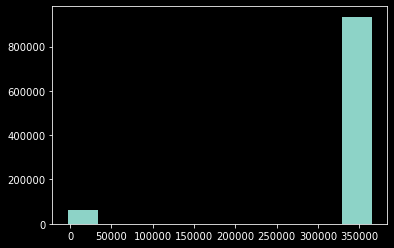

In [160]:
dfd=previous_application['DAYS_FIRST_DRAWING']
plt.hist(dfd)
plt.show()

In [171]:
# Just out of curiosity, replacement of anomalous values and new description
dfd=previous_application['DAYS_FIRST_DRAWING'].replace({365243.0: np.nan})
dfd.describe()

count    62705.000000
mean     -1035.246791
std        922.710316
min      -2922.000000
25%      -1721.000000
50%       -621.000000
75%       -303.000000
max         -2.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [169]:
previous_application.drop_duplicates('SK_ID_CURR').shape

(338857, 37)

Very few usable data: only 62'705 out of 1,670,214 (about 3.75%). On the other hand several lines can relate to the same client, so it's normal that there is some kind of reduction. That said, if we consider the SK_ID_CURR feature, we still have 338'857 unique entries. 63'750 compared to 338'857 is not even 20%. It's therefore much more than a simple reduction. 

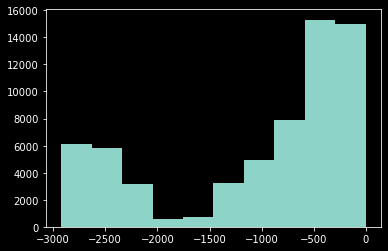

In [167]:
plt.hist(dfd)
plt.show()

In [149]:
previous_application[previous_application['SK_ID_CURR']==100006].drop_duplicates('SK_ID_PREV').sort_values(by='SK_ID_PREV',ascending=True)[['SK_ID_PREV','NAME_CONTRACT_TYPE']]

,SK_ID_PREV,NAME_CONTRACT_TYPE
1131133,1020698,Cash loans
1232752,1243599,Cash loans
900957,1489396,Revolving loans
1607443,1697039,Cash loans
98162,2078043,Cash loans
830967,2190416,Consumer loans
1333657,2299329,Consumer loans
1595430,2545789,Cash loans
617859,2827850,Revolving loans


We find the SK_ID_PREV of client 100006 including 1489396 that we had in 'credit_card_balance' as well as those already observed in the dataframes payment_installments and POS_CASH_balance (2078043, 2190416, 2299329). On the other hand, we also have several SK_ID_PREV unknown (1020698, 1243599, 1697039, 2545789, 2827850).  

All types of contract are present and it should be noted that POS_CASH_balance does not only concern cash loans because two SK_ID_PREV of POS_CASH_balance relate to consumer loans.

In [150]:
# Remove the dataframe to free memory space
gc.enable()
del previous_application
gc.collect()

60

This very last dataframe marks the end of this exploratory notebook.